#Introduction
This is a step by step approach to the Predictive Insights competition.

Youth unemployment and under-employment is a major concern for any developing country, and serves as an important predictor of economic health and prosperity. Being able to predict, and understand, which young people will find employment and which ones will require additional help, helps promote evidence-based decision-making, supports economic empowerment, and allows young people to thrive in their chosen careers.

The objective of this challenge is to build a machine learning model that predicts youth employment, based on data from labour market surveys in South Africa.

This solution will help organisations like Predictive Insights achieve a baseline prediction of young peoples’ employment outcomes, allowing them to design and test interventions to help youth make a transition into the labour market or to improve their earnings.

#The Data
The data for this challenge comes from four rounds of a survey of youth in the South African labour market, conducted at 6-month intervals. The survey contains numerical, categorical and free-form text responses. You will also receive additional demographic information such as age and information about school level and results.

Each person in the dataset was surveyed one year prior (the ‘baseline’ data) to the follow-up survey. We are interested in predicting whether a person is employed at the follow-up survey based on their labour market status and other characteristics during the baseline.

The training set consists of one row or observation per individual - information collected at baseline plus only the target outcome (whether they were employed or not) one year later. The test set consists of the data collected at baseline without the target outcome.

The objective of this challenge is to predict whether a young person will be employed, one year after the baseline survey, based on their demographic characteristics, previous and current labour market experience and education outcomes, and to deliver an easy-to-understand and insightful solution to the data team at Predictive Insights.

#The Objective
is to build a machine learning model that predicts youth employment, based on data from labour market surveys in South Africa.

# Exploratory Data Analysis



In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.compose import make_column_transformer
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import train_test_split
from tqdm import tqdm
import gc
import scipy.stats as stats
import plotly.express as px
# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

# Set display options
pd.set_option('display.max_columns', None)


### Load Data

In [ ]:
df_train = pd.read_csv("Train.csv")
df_test = pd.read_csv("Test.csv")
Submission=pd.read_csv('SampleSubmission.csv')

##Data Exploration
1. Data Overview

In [ ]:
df_train.head()

,Person_id,Survey_date,Round,Status,Tenure,Geography,Province,Matric,Degree,Diploma,Schoolquintile,Math,Mathlit,Additional_lang,Home_lang,Science,Female,Sa_citizen,Birthyear,Birthmonth,Target
0,Id_eqz61wz7yn,2022-02-23,2,studying,NaN,Rural,Mpumalanga,1.0,0.0,0.0,3.0,0 - 29 %,NaN,50 - 59 %,NaN,0 - 29 %,1,1,2000,5,0
1,Id_kj5k3g5wud,2023-02-06,4,unemployed,427.0,Suburb,North West,1.0,0.0,0.0,1.0,30 - 39 %,NaN,40 - 49 %,NaN,30 - 39 %,1,1,1989,4,1
2,Id_9h0isj38y4,2022-08-08,3,other,NaN,Urban,Free State,1.0,0.0,0.0,NaN,30 - 39 %,NaN,40 - 49 %,NaN,30 - 39 %,0,1,1996,7,1
3,Id_5ch3zwpdef,2022-03-16,2,unemployed,810.0,Urban,Eastern Cape,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,1,2000,1,0
4,Id_g4elxibjej,2023-03-22,4,studying,NaN,Urban,Limpopo,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,1,1998,12,0


In [ ]:
df_test.tail()

,Person_id,Survey_date,Round,Status,Tenure,Geography,Province,Matric,Degree,Diploma,Schoolquintile,Math,Mathlit,Additional_lang,Home_lang,Science,Female,Sa_citizen,Birthyear,Birthmonth
1929,Id_iogk84m72d,2022-08-05,3,unemployed,948.0,Urban,Gauteng,1.0,0.0,0.0,1.0,0 - 29 %,NaN,50 - 59 %,NaN,30 - 39 %,1,1,2000,1
1930,Id_exoifxvj0s,2023-03-06,4,studying,NaN,Urban,Gauteng,1.0,0.0,0.0,NaN,30 - 39 %,NaN,50 - 59 %,NaN,30 - 39 %,1,1,2000,1
1931,Id_ixio0xbvta,2023-02-02,4,unemployed,767.0,Rural,Mpumalanga,1.0,NaN,NaN,1.0,30 - 39 %,NaN,50 - 59 %,NaN,50 - 59 %,0,1,2000,1
1932,Id_3vjt2lnwp3,2023-03-02,4,studying,NaN,Urban,North West,1.0,0.0,0.0,0.0,NaN,40 - 49 %,NaN,50 - 59 %,NaN,1,1,2000,1
1933,Id_q8na9byk0c,2023-02-02,4,wage employed,5.0,Urban,Western Cape,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,1,1988,3


In [ ]:
shape_train = df_train.shape
shape_test = df_test.shape
print("Shape of df_train - Number of rows:", shape_train[0])
print("Shape of df_train - Number of columns:", shape_train[1])

print("Shape of df_test - Number of rows:", shape_test[0])
print("Shape of df_test - Number of columns:", shape_test[1])

Shape of df_train - Number of rows: 4020
Shape of df_train - Number of columns: 21
Shape of df_test - Number of rows: 1934
Shape of df_test - Number of columns: 20


In [ ]:
df_train.dtypes

Person_id           object
Survey_date         object
Round                int64
Status              object
Tenure             float64
Geography           object
Province            object
Matric             float64
Degree             float64
Diploma            float64
Schoolquintile     float64
Math                object
Mathlit             object
Additional_lang     object
Home_lang           object
Science             object
Female               int64
Sa_citizen           int64
Birthyear            int64
Birthmonth           int64
Target               int64
dtype: object

#Overview of columns

In [ ]:
df_train.columns

Index(['Person_id', 'Survey_date', 'Round', 'Status', 'Tenure', 'Geography',
       'Province', 'Matric', 'Degree', 'Diploma', 'Schoolquintile', 'Math',
       'Mathlit', 'Additional_lang', 'Home_lang', 'Science', 'Female',
       'Sa_citizen', 'Birthyear', 'Birthmonth', 'Target'],
      dtype='object')

1.Person_id: a unique identifier for each individual

2.Survey_date: date on which the survey was conducted for each individual.

3..Round: round of the survey

4.Status: individual current status

5.Tenure: time an individual has spent in their current job or employment position.

5.Geography:geographical area where the individual is located.

6.Province: the province in South Africa where the individual resides.

7.Matric: whether the individual has completed Matric, which is the final year of high school education in South Africa.

8.Degree: whether the individual holds a university degree.

9.Diploma: whether the individual holds a diploma.

10.Schoolquintile: the quintile of the school the individual attended. In South Africa, schools are classified into quintiles based on their socioeconomic status.

11.Math: individual's performance or score in mathematics.

12.Mathlit: individual's performance or score in mathematical literacy.

13.Additional_lang: individual's Additional lanaguage score.

14.Home_lang: the individual's home or primary language score

15.Science: the individual's performance or score in science.

16.Female/Gender: indicating the gender of the individual, where 1 represent female.

17.Sa_citizen: indicating whether the individual is a South African citizen.

18 Birthyear: birth year of the individual.

19.Birthmonth: This column represents the birth month of the individual.

Target: the target variable that we want to predict using your .It represent whether the individual is employed or not,

##Descriptive statistics

In [ ]:
df_train.describe()

,Round,Tenure,Matric,Degree,Diploma,Schoolquintile,Female,Sa_citizen,Birthyear,Birthmonth,Target
count,4020.000000,2626.000000,3012.000000,2189.000000,2211.000000,2359.000000,4020.000000,4020.000000,4020.000000,4020.000000,4020.000000
mean,3.129851,582.883092,0.850598,0.078118,0.081411,2.696482,0.564428,0.999502,1997.462935,5.344030,0.271891
std,0.978014,621.220657,0.356544,0.268418,0.273527,1.318409,0.495893,0.022302,4.378334,3.805916,0.444989
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1972.000000,1.000000,0.000000
25%,2.000000,95.000000,1.000000,0.000000,0.000000,2.000000,0.000000,1.000000,1995.000000,1.000000,0.000000
50%,3.000000,395.000000,1.000000,0.000000,0.000000,3.000000,1.000000,1.000000,1999.000000,5.000000,0.000000
75%,4.000000,819.000000,1.000000,0.000000,0.000000,4.000000,1.000000,1.000000,2000.000000,9.000000,1.000000
max,4.000000,3560.000000,1.000000,1.000000,1.000000,5.000000,1.000000,1.000000,2004.000000,12.000000,1.000000


Round:
The data contains four rounds of surveys (min: 1, max: 4), indicating the data spans data collected in four different survey rounds.

Tenure:

Tenure The average tenure in the current job or position is approximately 582.88 days. The standard deviation of tenure is relatively high (621.22), indicating a wide variation in job duration among the respondents. The minimum tenure is 0, which suggests that some individuals may have reported that they are not currently/never employed. The maximum tenure is 3560 days, which represents the longest duration reported by any individual in their current job.

Matric example, Matric has a mean of approximately 0.85, indicating that around 85% of respondents have completed Matric (final year of high school education).

Degree and Diploma columns have low means (around 0.08 and 0.081, respectively), indicating that a small proportion of respondents have a university degree or a diploma.

Schoolquintile has a mean of approximately 2.70, indicating that respondents, on average, come from schools classified as quintile 3

Female/gender and Sa_citizen have means close to 0.5, suggesting that the dataset has a relatively balanced representation of genders and South African citizens.

The Target column has a mean of around 0.27, indicating that approximately 27% of the respondents are

 employed Birthyear and Birthmonth:

The birth years range from 1972 (min) to 2004 (max) The mean birth year is approximately 1997

##Missing values

In [ ]:
missing_values = df_train.isnull().sum()
missing_percentage = (missing_values / len(df_train)) * 100
missing_data = pd.DataFrame({'Missing Values': missing_values, 'Missing Percentage': missing_percentage})
missing_data = missing_data.sort_values(by='Missing Percentage', ascending=False)
print(missing_data)

                 Missing Values  Missing Percentage
Home_lang                  3639           90.522388
Science                    3288           81.791045
Math                       3023           75.199005
Mathlit                    2667           66.343284
Additional_lang            2002           49.800995
Degree                     1831           45.547264
Diploma                    1809           45.000000
Schoolquintile             1661           41.318408
Tenure                     1394           34.676617
Matric                     1008           25.074627
Birthmonth                    0            0.000000
Birthyear                     0            0.000000
Sa_citizen                    0            0.000000
Female                        0            0.000000
Person_id                     0            0.000000
Survey_date                   0            0.000000
Province                      0            0.000000
Geography                     0            0.000000
Status      

In [ ]:
missing_values = df_test.isnull().sum()
missing_percentage = (missing_values / len(df_test)) * 100
missing_data = pd.DataFrame({'Missing Values': missing_values, 'Missing Percentage': missing_percentage})
missing_data = missing_data.sort_values(by='Missing Percentage', ascending=False)
print(missing_data)

                 Missing Values  Missing Percentage
Home_lang                  1750           90.486039
Science                    1580           81.695967
Math                       1439           74.405377
Mathlit                    1319           68.200620
Additional_lang             983           50.827301
Degree                      888           45.915202
Diploma                     881           45.553257
Schoolquintile              818           42.295760
Tenure                      732           37.849018
Matric                      524           27.094105
Birthyear                     0            0.000000
Sa_citizen                    0            0.000000
Female                        0            0.000000
Person_id                     0            0.000000
Survey_date                   0            0.000000
Province                      0            0.000000
Geography                     0            0.000000
Status                        0            0.000000
Round       

# UNIVARIATE ANALYSIS

**Gender**

In [ ]:
distribution= df_train['Female'].value_counts()
total_samples = df_train['Female'].count()
percentage_female = (distribution[1] / total_samples) * 100
percentage_male = (distribution[0] / total_samples) * 100

print(distribution)
print(f"Percentage of Female: {percentage_female:.2f}%")
print(f"Percentage of Male: {percentage_male:.2f}%")

1    2269
0    1751
Name: Female, dtype: int64
Percentage of Female: 56.44%
Percentage of Male: 43.56%


<Axes: >

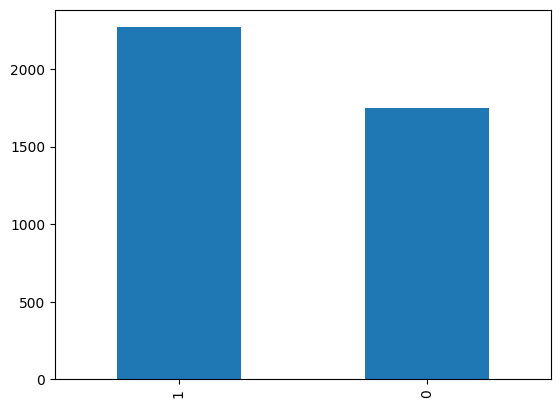

In [ ]:
distribution.plot(kind='bar')

Gender Distribution shows that  females are mostly represented than males , by just small percentage which can be ignored and then deem the Gender distribution is perfectly balanced

**Tenure**

In [ ]:
df_train["Tenure"].describe()

count    2626.000000
mean      582.883092
std       621.220657
min         0.000000
25%        95.000000
50%       395.000000
75%       819.000000
max      3560.000000
Name: Tenure, dtype: float64

In [ ]:
# choosing the maximum  value in Tenure for more robust analysis
tenure_value = 3560
months_in_a_year=12
days_in_a_year=365
# Assuming Tenure is in months
average_tenure_months_years = tenure_value / months_in_a_year

# Assuming Tenure is in days
average_tenure_days_years = tenure_value / days_in_a_year

print("Assuming Tenure is in months:")
print("Average Tenure: {:.2f} years".format(average_tenure_months_years))

print("\nAssuming Tenure is in days:")
print("Average Tenure: {:.2f} years".format(average_tenure_days_years))


Assuming Tenure is in months:
Average Tenure: 296.67 years

Assuming Tenure is in days:
Average Tenure: 9.75 years


therefore i can conclude that Tenure is in Days (using the maximum Tenure recoreded)

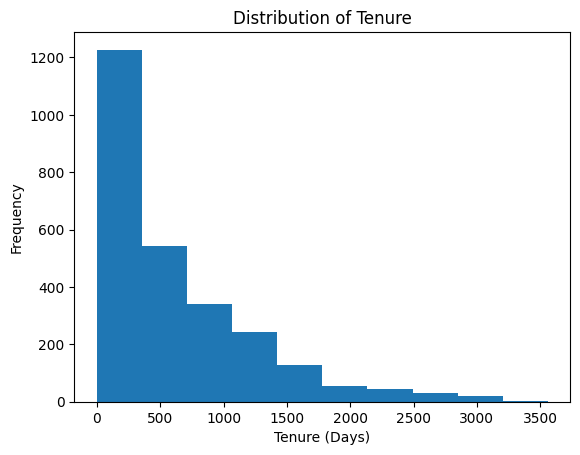

In [ ]:
plt.hist(df_train["Tenure"], bins=10)
plt.xlabel("Tenure (Days)")
plt.ylabel("Frequency")
plt.title("Distribution of Tenure")
plt.show()

In [ ]:
skewness_tenure = df_train['Tenure'].skew()

print(f"Skewness for Tenure: {skewness_tenure:.2f}")

Skewness for Tenure: 1.59


Tenure as it represent  the duration an individual has been in their respective status in days , the distribution curves shows us that it is skewed to the left. more data is distributed or concetrated on the left,

#Education Variables

##SchoolQuintiles

The quintile system in South Africa public  classifies schools into five groups, from the poorest (Quintile 1) to the least poor (Quintile 5)

Schools in each province are therefore classified into five groups from the most poor to the least poor. For example Quintile 1 is a group of schools in each province catering for the poorest 20% of schools. Quintile 2 caters for the next poorest 20% of schools while Quintile 5 schools represent the least poor. Schools receive money from government according to Quintiles. Quintile 1 schools receive the highest allocation per learner, while Quintile 5 receives the lowest.

In [ ]:
school_quintile_counts = df_train["Schoolquintile"].value_counts()
school_quintile_counts

3.0    739
2.0    504
1.0    445
4.0    329
5.0    275
0.0     67
Name: Schoolquintile, dtype: int64

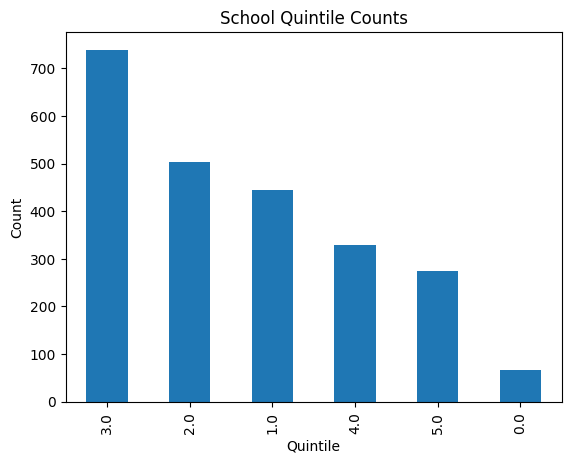

In [ ]:
df_train["Schoolquintile"].value_counts().plot(kind='bar')
plt.xlabel('Quintile')
plt.ylabel('Count')
plt.title('School Quintile Counts')
plt.show()

more respondent are from qunitile 3 schools followed by 2 and then 1, indicating that quintile 4 and 5 schools are accessed by few individuals in a country who are able ( most of those schools in quintile  4 and 5 pay fees ) while qunitile 0 might indicate those who dont know or entries entailing missing values

##Degree

In [ ]:
degree_counts = df_train["Degree"].value_counts()
print(degree_counts)

0.0    2018
1.0     171
Name: Degree, dtype: int64


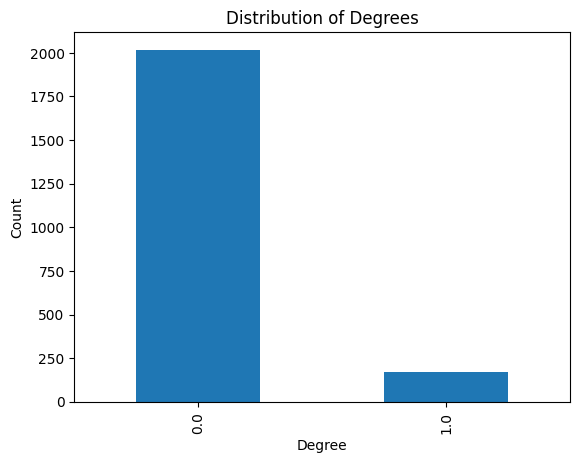

In [ ]:
df_train["Degree"].value_counts().plot(kind='bar')
plt.xlabel('Degree')
plt.ylabel('Count')
plt.title('Distribution of Degrees')
plt.show()

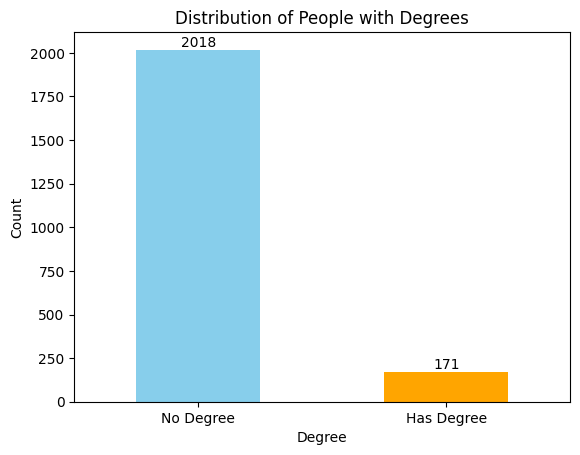

In [ ]:
labels = {0: 'No Degree', 1: 'Has Degree'}
degree_counts = df_train["Degree"].map(labels).value_counts()

ax = degree_counts.plot(kind='bar', color=['skyblue', 'orange'])
ax.set_xlabel('Degree')
ax.set_ylabel('Count')
ax.set_title('Distribution of People with Degrees')
ax.set_xticklabels(ax.get_xticklabels(), rotation=0)

for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() + p.get_width() / 2, p.get_height()), ha='center', va='bottom')

plt.show()


Few people have Degree's

##Diploma

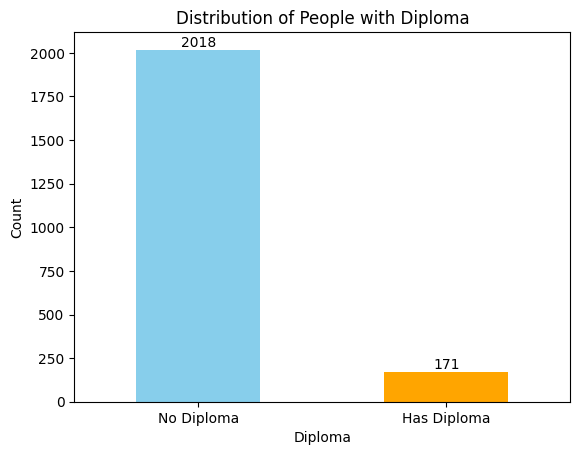

In [ ]:


# Mapping labels
labels = {0: 'No Diploma', 1: 'Has Diploma'}

# Map the 'Degree' column to labels and plot the bar graph
ax = df_train["Degree"].map(labels).value_counts().plot(kind='bar', color=['skyblue', 'orange'])
ax.set_xlabel('Diploma')
ax.set_ylabel('Count')
ax.set_title('Distribution of People with Diploma')
ax.set_xticklabels(ax.get_xticklabels(), rotation=0)

# Annotating the counts on top of the bars
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() + p.get_width() / 2, p.get_height()), ha='center', va='bottom')

plt.show()


few people have Diploma

##Matric

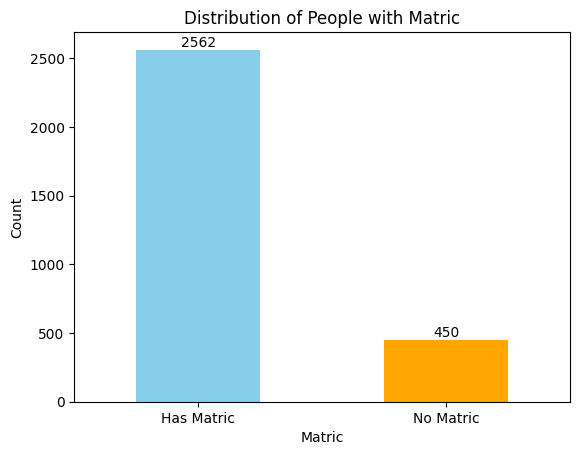

In [ ]:
import matplotlib.pyplot as plt

# Mapping labels
labels = {0: 'No Matric', 1: 'Has Matric'}

# Map the 'Matric' column to labels and plot the bar graph
ax = df_train["Matric"].map(labels).value_counts().plot(kind='bar', color=['skyblue', 'orange'])
ax.set_xlabel('Matric')
ax.set_ylabel('Count')
ax.set_title('Distribution of People with Matric')
ax.set_xticklabels(ax.get_xticklabels(), rotation=0)

# Annotating the counts on top of the bars
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() + p.get_width() / 2, p.get_height()), ha='center', va='bottom')

plt.show()


In [ ]:
df_train.head()

,Person_id,Survey_date,Round,Status,Tenure,Geography,Province,Matric,Degree,Diploma,Schoolquintile,Math,Mathlit,Additional_lang,Home_lang,Science,Female,Sa_citizen,Birthyear,Birthmonth,Target
0,Id_eqz61wz7yn,2022-02-23,2,studying,NaN,Rural,Mpumalanga,1.0,0.0,0.0,3.0,0 - 29 %,NaN,50 - 59 %,NaN,0 - 29 %,1,1,2000,5,0
1,Id_kj5k3g5wud,2023-02-06,4,unemployed,427.0,Suburb,North West,1.0,0.0,0.0,1.0,30 - 39 %,NaN,40 - 49 %,NaN,30 - 39 %,1,1,1989,4,1
2,Id_9h0isj38y4,2022-08-08,3,other,NaN,Urban,Free State,1.0,0.0,0.0,NaN,30 - 39 %,NaN,40 - 49 %,NaN,30 - 39 %,0,1,1996,7,1
3,Id_5ch3zwpdef,2022-03-16,2,unemployed,810.0,Urban,Eastern Cape,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,1,2000,1,0
4,Id_g4elxibjej,2023-03-22,4,studying,NaN,Urban,Limpopo,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,1,1998,12,0


more people have matric

##Summary/insights and Assumption based on education features

More Matric Completions:
A lot of people have finished high school (matric).

Fewer Higher Degrees:
Not many have diplomas or degrees, hinting that going beyond high school might be challenging. This could be due to money problems or tough entry requirements to universities or colleges .which futher indicates or hint to us to question the quality of our high school education system

Money Matters:
It seems costs may be a big problem to pursuing further education. Higher education can be expensive, which could

High School Quality Matters:
Doing well in high school (matric) is important for getting into higher education. If the quality of high school education is not good, it might hold people back.

Money and Background Impact:
Your family's financial situation can significantly affect your educational path. People from less wealthy families might struggle more to go to university.

In summary, many achieve high school education, but fewer go on to higher levels. Money, high school quality, and family finances play crucial roles in educational progress. Addressing these factors is vital for improving access to higher education.

#Location features

## Sa_citizen

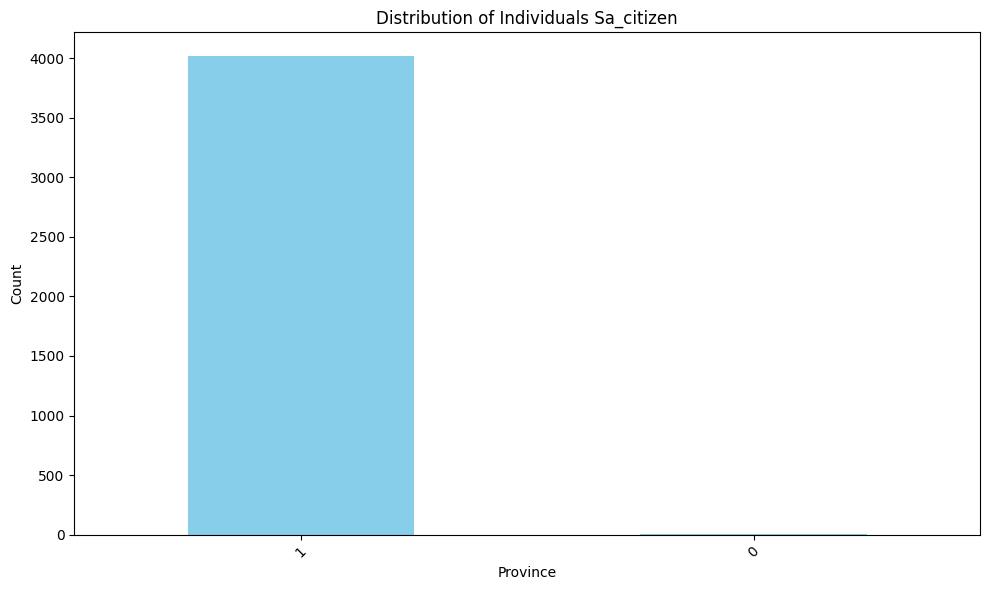

In [ ]:
pc = df_train['Sa_citizen'].value_counts()
plt.figure(figsize=(10, 6))
pc.plot(kind='bar', color='skyblue')
plt.xlabel('Province')
plt.ylabel('Count')
plt.title('Distribution of Individuals Sa_citizen')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Everyone in the dataset/entries is from south africa

##Provinces

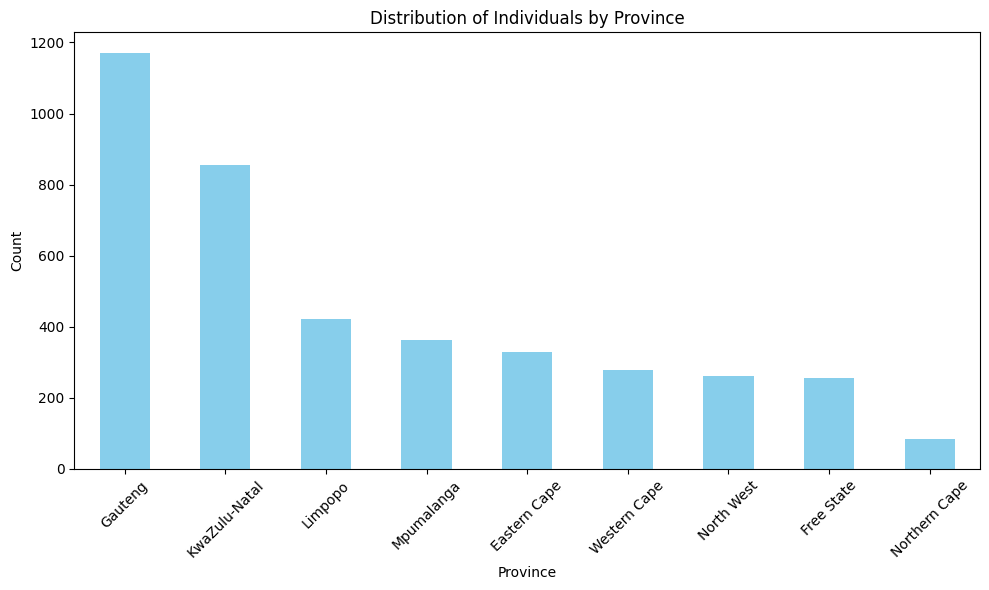

In [ ]:

pc = df_train['Province'].value_counts()
plt.figure(figsize=(10, 6))
pc.plot(kind='bar', color='skyblue')
plt.xlabel('Province')
plt.ylabel('Count')
plt.title('Distribution of Individuals by Province')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


##Geography

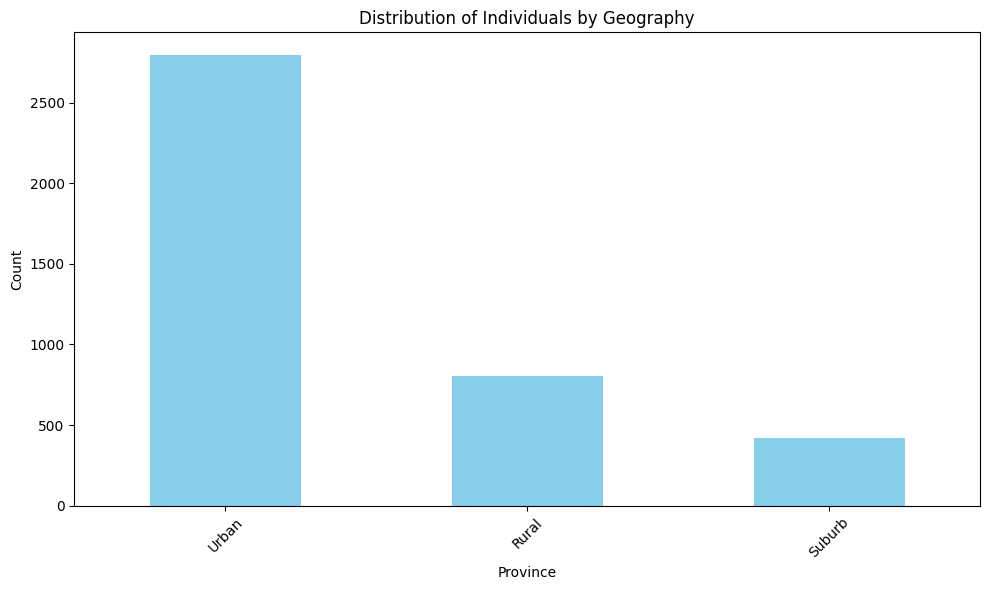

In [ ]:
pc = df_train['Geography'].value_counts()
plt.figure(figsize=(10, 6))
pc.plot(kind='bar', color='skyblue')
plt.xlabel('Province')
plt.ylabel('Count')
plt.title('Distribution of Individuals by Geography')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

##Summary/insights and Assumption based on location features

Most of the data is from Kwazulu natal and Gauteng.  proly maybe bacause of Gauteng being the economic hub of south africa(and highly populated province) is quite fair to collect more data from there. high sample from there quite describe the overrall outcome of all other provinces.  also another reason we have more entries from Urban areas

#Grades or Matric Marks features

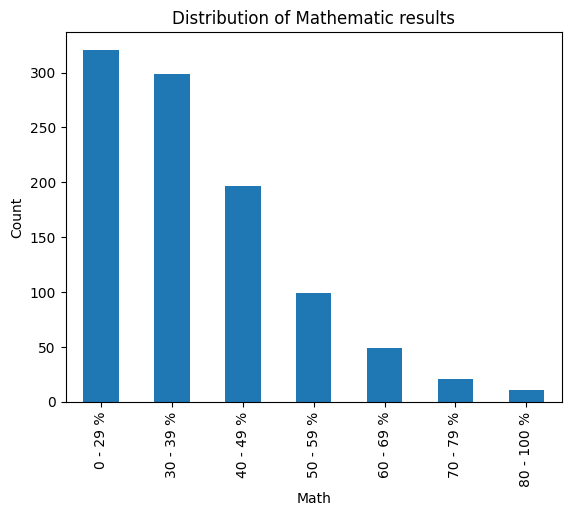

In [ ]:
#MATHEMATICS RESULTS

df_train["Math"].value_counts().plot(kind='bar')
plt.xlabel('Math')
plt.ylabel('Count')
plt.title('Distribution of Mathematic results')
plt.show()

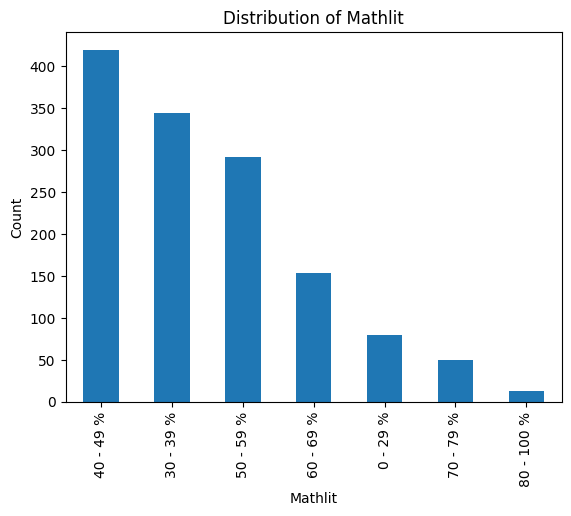

In [ ]:
#MATHLIT RESULTS
df_train["Mathlit"].value_counts().plot(kind='bar')
plt.xlabel('Mathlit')
plt.ylabel('Count')
plt.title('Distribution of Mathlit')
plt.show()

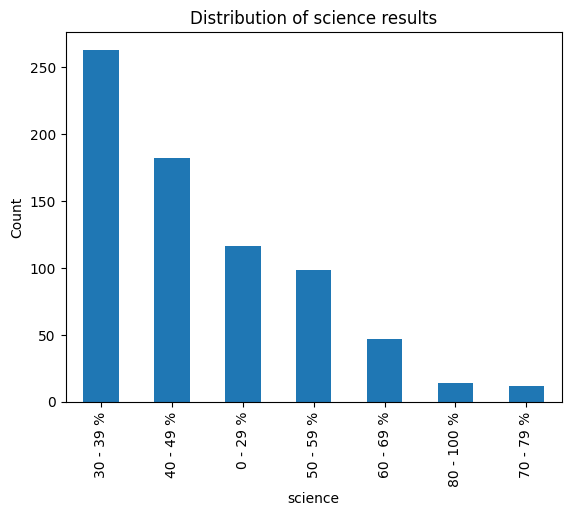

In [ ]:
#SCIENCE RESULTS
df_train["Science"].value_counts().plot(kind='bar')
plt.xlabel('science')
plt.ylabel('Count')
plt.title('Distribution of science results')
plt.show()

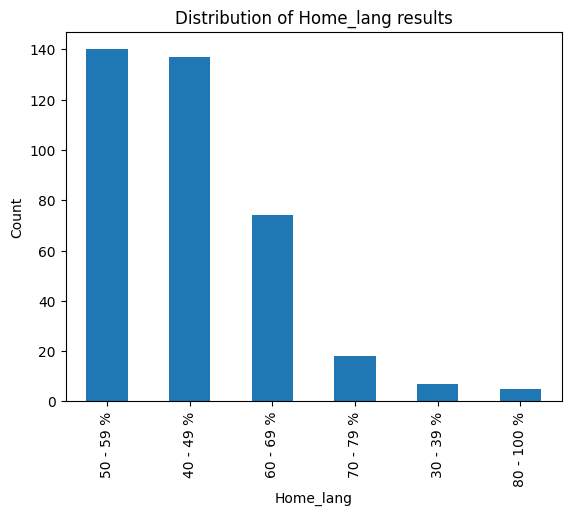

In [ ]:
#HOME LANGUAGE  RESULTS
df_train["Home_lang"].value_counts().plot(kind='bar')
plt.xlabel('Home_lang')
plt.ylabel('Count')
plt.title('Distribution of Home_lang results')
plt.show()

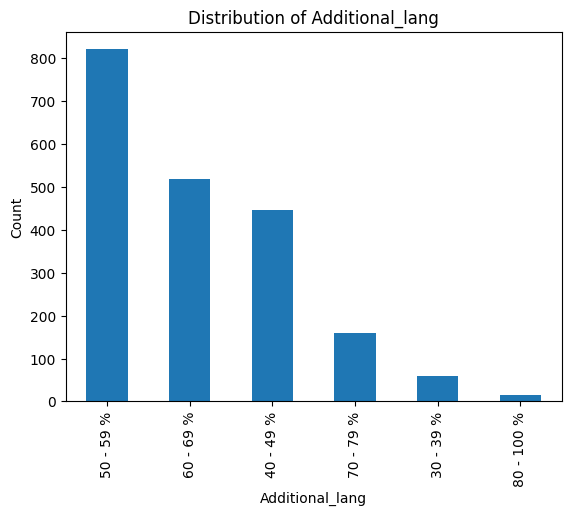

In [ ]:
#ADDITIONAL LANGUAGE  RESULTS
df_train["Additional_lang"].value_counts().plot(kind='bar')
plt.xlabel('Additional_lang')
plt.ylabel('Count')
plt.title('Distribution of Additional_lang')
plt.show()

In [ ]:
df_train.head()

,Person_id,Survey_date,Round,Status,Tenure,Geography,Province,Matric,Degree,Diploma,Schoolquintile,Math,Mathlit,Additional_lang,Home_lang,Science,Female,Sa_citizen,Birthyear,Birthmonth,Target
0,Id_eqz61wz7yn,2022-02-23,2,studying,NaN,Rural,Mpumalanga,1.0,0.0,0.0,3.0,0 - 29 %,NaN,50 - 59 %,NaN,0 - 29 %,1,1,2000,5,0
1,Id_kj5k3g5wud,2023-02-06,4,unemployed,427.0,Suburb,North West,1.0,0.0,0.0,1.0,30 - 39 %,NaN,40 - 49 %,NaN,30 - 39 %,1,1,1989,4,1
2,Id_9h0isj38y4,2022-08-08,3,other,NaN,Urban,Free State,1.0,0.0,0.0,NaN,30 - 39 %,NaN,40 - 49 %,NaN,30 - 39 %,0,1,1996,7,1
3,Id_5ch3zwpdef,2022-03-16,2,unemployed,810.0,Urban,Eastern Cape,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,1,2000,1,0
4,Id_g4elxibjej,2023-03-22,4,studying,NaN,Urban,Limpopo,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,1,1998,12,0


In [ ]:
nan_mathematics_rows = df_train[df_train['Math'].isna()]
nan_mathematics_rows

,Person_id,Survey_date,Round,Status,Tenure,Geography,Province,Matric,Degree,Diploma,Schoolquintile,Math,Mathlit,Additional_lang,Home_lang,Science,Female,Sa_citizen,Birthyear,Birthmonth,Target
3,Id_5ch3zwpdef,2022-03-16,2,unemployed,810.0,Urban,Eastern Cape,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,1,2000,1,0
4,Id_g4elxibjej,2023-03-22,4,studying,NaN,Urban,Limpopo,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,1,1998,12,0
5,Id_l9uksprsdf,2023-03-23,4,studying,NaN,Rural,KwaZulu-Natal,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,1,1996,12,0
7,Id_snwm3eylks,2023-02-28,4,unemployed,462.0,Urban,Mpumalanga,0.0,0.0,0.0,3.0,NaN,NaN,NaN,NaN,NaN,0,1,1997,1,0
9,Id_mj4hcy8x75,2023-03-01,4,self employed,1859.0,Rural,Limpopo,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,1,1991,4,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4014,Id_k2enmnuiqk,2022-07-28,3,unemployed,35.0,Urban,Gauteng,1.0,0.0,0.0,3.0,NaN,40 - 49 %,40 - 49 %,NaN,NaN,1,1,2002,8,0
4015,Id_3lxfvtmbkr,2023-02-13,4,wage employed,273.0,Rural,Limpopo,1.0,0.0,0.0,2.0,NaN,40 - 49 %,50 - 59 %,NaN,NaN,1,1,2000,1,0
4016,Id_u3uc3v9pts,2023-02-02,4,unemployed,401.0,Urban,Gauteng,1.0,0.0,1.0,NaN,NaN,40 - 49 %,60 - 69 %,NaN,NaN,0,1,1999,3,0
4017,Id_enkksj5q5r,2023-03-20,4,unemployed,2287.0,Urban,KwaZulu-Natal,0.0,0.0,0.0,1.0,NaN,NaN,NaN,NaN,NaN,1,1,1991,10,0


In [ ]:
nan_mathlit_rows = df_train[df_train['Mathlit'].isna()]
nan_mathlit_rows

,Person_id,Survey_date,Round,Status,Tenure,Geography,Province,Matric,Degree,Diploma,Schoolquintile,Math,Mathlit,Additional_lang,Home_lang,Science,Female,Sa_citizen,Birthyear,Birthmonth,Target
0,Id_eqz61wz7yn,2022-02-23,2,studying,NaN,Rural,Mpumalanga,1.0,0.0,0.0,3.0,0 - 29 %,NaN,50 - 59 %,NaN,0 - 29 %,1,1,2000,5,0
1,Id_kj5k3g5wud,2023-02-06,4,unemployed,427.0,Suburb,North West,1.0,0.0,0.0,1.0,30 - 39 %,NaN,40 - 49 %,NaN,30 - 39 %,1,1,1989,4,1
2,Id_9h0isj38y4,2022-08-08,3,other,NaN,Urban,Free State,1.0,0.0,0.0,NaN,30 - 39 %,NaN,40 - 49 %,NaN,30 - 39 %,0,1,1996,7,1
3,Id_5ch3zwpdef,2022-03-16,2,unemployed,810.0,Urban,Eastern Cape,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,1,2000,1,0
4,Id_g4elxibjej,2023-03-22,4,studying,NaN,Urban,Limpopo,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,1,1998,12,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4010,Id_nq1emxv5a4,2022-02-28,2,studying,NaN,Urban,Eastern Cape,1.0,0.0,1.0,1.0,60 - 69 %,NaN,40 - 49 %,NaN,50 - 59 %,0,1,1998,8,0
4012,Id_iqx0jvqalz,2022-08-12,3,self employed,889.0,Urban,Eastern Cape,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,1,1999,3,1
4017,Id_enkksj5q5r,2023-03-20,4,unemployed,2287.0,Urban,KwaZulu-Natal,0.0,0.0,0.0,1.0,NaN,NaN,NaN,NaN,NaN,1,1,1991,10,0
4018,Id_3rtpd7kc1g,2022-03-15,2,studying,NaN,Urban,Eastern Cape,1.0,NaN,NaN,3.0,40 - 49 %,NaN,60 - 69 %,NaN,50 - 59 %,1,1,2000,1,1


In [ ]:
nan_additional_rows = df_train[df_train['Additional_lang'].isna()]
nan_additional_rows

,Person_id,Survey_date,Round,Status,Tenure,Geography,Province,Matric,Degree,Diploma,Schoolquintile,Math,Mathlit,Additional_lang,Home_lang,Science,Female,Sa_citizen,Birthyear,Birthmonth,Target
3,Id_5ch3zwpdef,2022-03-16,2,unemployed,810.0,Urban,Eastern Cape,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,1,2000,1,0
4,Id_g4elxibjej,2023-03-22,4,studying,NaN,Urban,Limpopo,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,1,1998,12,0
5,Id_l9uksprsdf,2023-03-23,4,studying,NaN,Rural,KwaZulu-Natal,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,1,1996,12,0
7,Id_snwm3eylks,2023-02-28,4,unemployed,462.0,Urban,Mpumalanga,0.0,0.0,0.0,3.0,NaN,NaN,NaN,NaN,NaN,0,1,1997,1,0
9,Id_mj4hcy8x75,2023-03-01,4,self employed,1859.0,Rural,Limpopo,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,1,1991,4,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4003,Id_imj31qup9c,2023-02-21,4,studying,NaN,Suburb,Eastern Cape,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,1,1995,12,0
4006,Id_4xwf6ma0tx,2022-08-08,3,other,NaN,Urban,Free State,1.0,0.0,0.0,5.0,NaN,50 - 59 %,NaN,50 - 59 %,NaN,1,1,2000,10,1
4012,Id_iqx0jvqalz,2022-08-12,3,self employed,889.0,Urban,Eastern Cape,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,1,1999,3,1
4017,Id_enkksj5q5r,2023-03-20,4,unemployed,2287.0,Urban,KwaZulu-Natal,0.0,0.0,0.0,1.0,NaN,NaN,NaN,NaN,NaN,1,1,1991,10,0


In [ ]:
nan_home_rows = df_train[df_train['Home_lang'].isna()]
nan_home_rows

,Person_id,Survey_date,Round,Status,Tenure,Geography,Province,Matric,Degree,Diploma,Schoolquintile,Math,Mathlit,Additional_lang,Home_lang,Science,Female,Sa_citizen,Birthyear,Birthmonth,Target
0,Id_eqz61wz7yn,2022-02-23,2,studying,NaN,Rural,Mpumalanga,1.0,0.0,0.0,3.0,0 - 29 %,NaN,50 - 59 %,NaN,0 - 29 %,1,1,2000,5,0
1,Id_kj5k3g5wud,2023-02-06,4,unemployed,427.0,Suburb,North West,1.0,0.0,0.0,1.0,30 - 39 %,NaN,40 - 49 %,NaN,30 - 39 %,1,1,1989,4,1
2,Id_9h0isj38y4,2022-08-08,3,other,NaN,Urban,Free State,1.0,0.0,0.0,NaN,30 - 39 %,NaN,40 - 49 %,NaN,30 - 39 %,0,1,1996,7,1
3,Id_5ch3zwpdef,2022-03-16,2,unemployed,810.0,Urban,Eastern Cape,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,1,2000,1,0
4,Id_g4elxibjej,2023-03-22,4,studying,NaN,Urban,Limpopo,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,1,1998,12,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4015,Id_3lxfvtmbkr,2023-02-13,4,wage employed,273.0,Rural,Limpopo,1.0,0.0,0.0,2.0,NaN,40 - 49 %,50 - 59 %,NaN,NaN,1,1,2000,1,0
4016,Id_u3uc3v9pts,2023-02-02,4,unemployed,401.0,Urban,Gauteng,1.0,0.0,1.0,NaN,NaN,40 - 49 %,60 - 69 %,NaN,NaN,0,1,1999,3,0
4017,Id_enkksj5q5r,2023-03-20,4,unemployed,2287.0,Urban,KwaZulu-Natal,0.0,0.0,0.0,1.0,NaN,NaN,NaN,NaN,NaN,1,1,1991,10,0
4018,Id_3rtpd7kc1g,2022-03-15,2,studying,NaN,Urban,Eastern Cape,1.0,NaN,NaN,3.0,40 - 49 %,NaN,60 - 69 %,NaN,50 - 59 %,1,1,2000,1,1


#Summary/insights and Assumption based on Grades features
A learner in matric must sit for a Home Language, First Additional Language, Mathematics or Mathematical Literacy.

Mathematics route goes with either Science or Ecoonomics and Accounting, while Mathematical Litercay goes with Accounting / economics, geograhy , but not with Science Streams

It is always compulsory to pass your home language with at least 40% – anything less than 40% for a home language means the learner has failed.

Bachelors – Will gain you provisional entrance into any University or degree course.

Diploma – Will gain you provisional entrance into any University of Technology or diploma course.

Certificate – Will gain you provisional entrance into any College or certificate course.

Compulsory Here are the compulsory subjects:

Home Language – To choose from the following official South African Languages:

Sesotho

Setswana

Siswati

Tshivenda

Xitsonga

Afrikaans

English

IsiNdebele

IsiXhosa

IsiZulu

Sepedi

Bachelors Degree Pass To achieve this Matric Pass Level, you need to meet these marks:

40% for your Home Language

50% for four other Higher Credit subjects

30% for two other subjects

Diploma Pass

To achieve this Matric Pass Level, you need to meet these marks:

40% for your Home Language

40% for four other High Credit subjects

30% for two other subjects

Higher Certificate Pass

To achieve this Matric Pass Level, you need to meet these marks:

40% in your Home Language

40% in two other subjects

30% in three other subjects

**Due to high missing entries for Home language leaves me to conclude that the languages used in this dataset is either English(Additional language) and Afrikanse(Home language )**



**And the missing entries in either mathematics, mathlit , home language and additional language this are not random missing entries but rather a Systematic Missing Values**

#Target Variable

In [ ]:
class_distribution = df_train['Target'].value_counts()

Class Distribution:
0    2927
1    1093
Name: Target, dtype: int64

Proportions:
0    0.728109
1    0.271891
Name: Target, dtype: float64


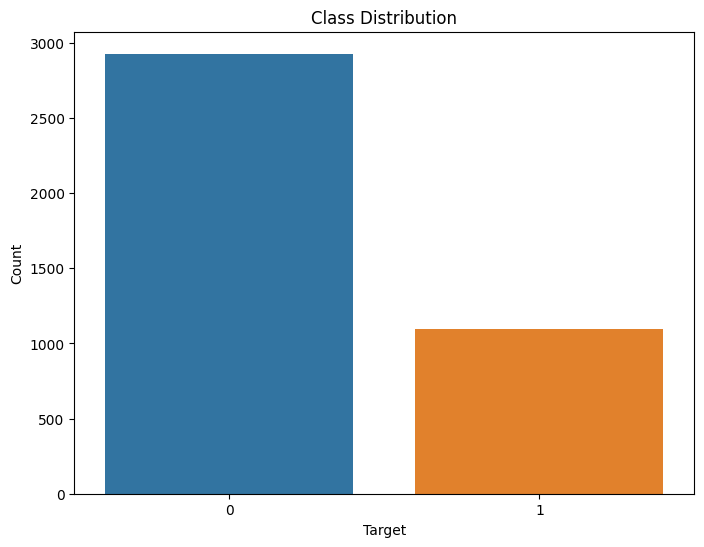

In [ ]:
total_samples = len(df_train)
proportions = class_distribution / total_samples

# Print class distribution
print("Class Distribution:")
print(class_distribution)
print("\nProportions:")
print(proportions)

# Visualize using a count plot
plt.figure(figsize=(8, 6))
sns.countplot(data=df_train, x='Target')
plt.xlabel('Target')
plt.ylabel('Count')
plt.title('Class Distribution')
plt.show()



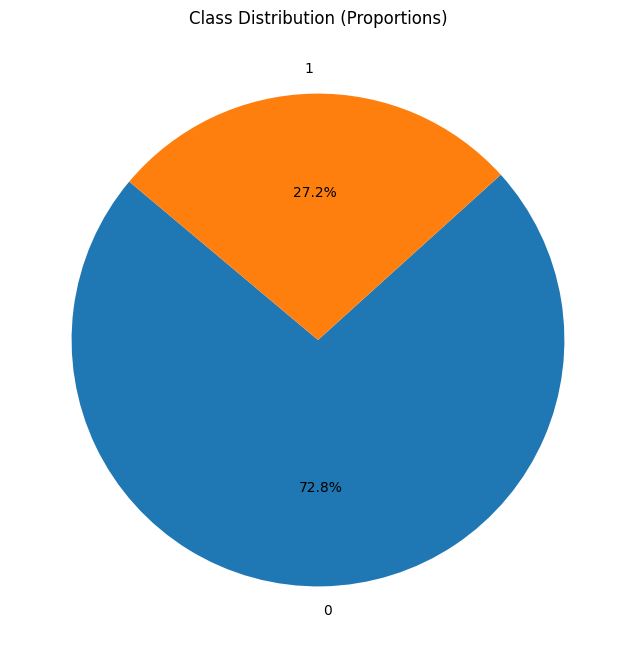

In [ ]:
# Visualize using a pie chart
plt.figure(figsize=(8, 8))
plt.pie(proportions, labels=proportions.index, autopct='%1.1f%%', startangle=140)
plt.title('Class Distribution (Proportions)')
plt.show()

The class distribution indicates that there is an imbalance in the dataset, with the negative class (Class 0) being the majority class (72.81%) and the positive class (Class 1) being the minority class (27.19%)

In [ ]:
df_train.head()

,Person_id,Survey_date,Round,Status,Tenure,Geography,Province,Matric,Degree,Diploma,Schoolquintile,Math,Mathlit,Additional_lang,Home_lang,Science,Female,Sa_citizen,Birthyear,Birthmonth,Target
0,Id_eqz61wz7yn,2022-02-23,2,studying,NaN,Rural,Mpumalanga,1.0,0.0,0.0,3.0,0 - 29 %,NaN,50 - 59 %,NaN,0 - 29 %,1,1,2000,5,0
1,Id_kj5k3g5wud,2023-02-06,4,unemployed,427.0,Suburb,North West,1.0,0.0,0.0,1.0,30 - 39 %,NaN,40 - 49 %,NaN,30 - 39 %,1,1,1989,4,1
2,Id_9h0isj38y4,2022-08-08,3,other,NaN,Urban,Free State,1.0,0.0,0.0,NaN,30 - 39 %,NaN,40 - 49 %,NaN,30 - 39 %,0,1,1996,7,1
3,Id_5ch3zwpdef,2022-03-16,2,unemployed,810.0,Urban,Eastern Cape,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,1,2000,1,0
4,Id_g4elxibjej,2023-03-22,4,studying,NaN,Urban,Limpopo,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,1,1998,12,0


# Birthyear

In [ ]:
df_train['Birthyear'].unique()

array([2000, 1989, 1996, 1998, 1997, 1991, 1999, 1992, 1987, 1994, 2001,
       1993, 2003, 1988, 2004, 2002, 1995, 1986, 1990, 1981, 1985, 1983,
       1982, 1977, 1984, 1979, 1980, 1976, 1973, 1972])

In [ ]:
summary_statistics = df_train['Birthyear'].describe()
summary_statistics

count    4020.000000
mean     1997.462935
std         4.378334
min      1972.000000
25%      1995.000000
50%      1999.000000
75%      2000.000000
max      2004.000000
Name: Birthyear, dtype: float64

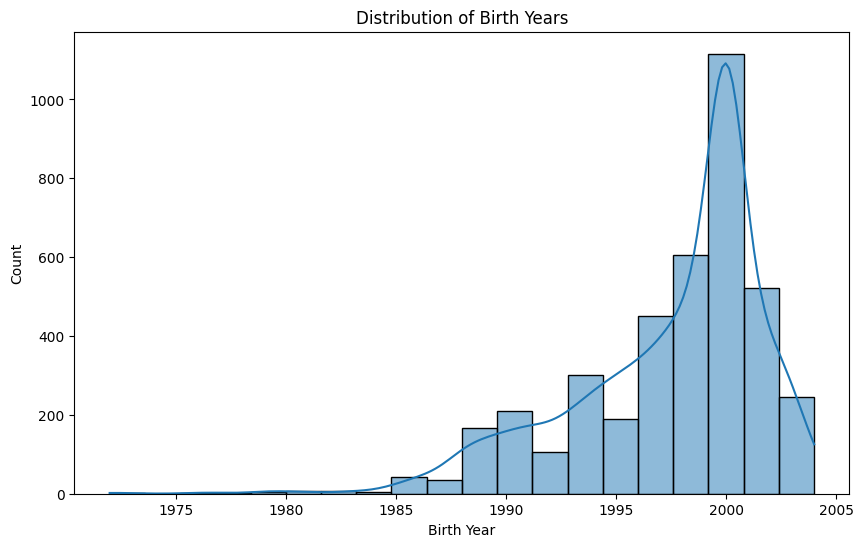

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(data=df_train, x='Birthyear', bins=20, kde=True)
plt.xlabel('Birth Year')
plt.ylabel('Count')
plt.title('Distribution of Birth Years')
plt.show()

Representative of Different Generations:
Generation A born in the 1970s and 1980s
and
Generation B born in the mid-1990s to early 2000s

Assumption or hypothesis is that as Generations changes from A to B even the number of highly qualified or educated people increases as changes in different carriculumns , more access to schools , we shall find out


# STATUS

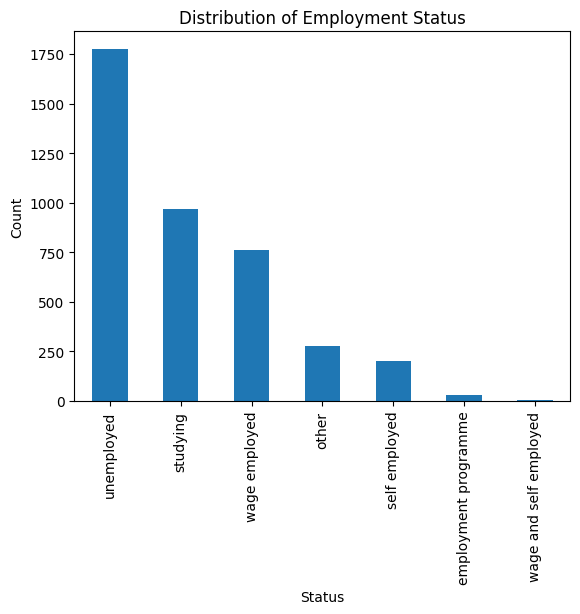

In [ ]:
df_train["Status"].value_counts().plot(kind='bar')
plt.xlabel('Status')
plt.ylabel('Count')
plt.title('Distribution of Employment Status')
plt.show()


high number of unemployed people  followed by more studying

# Bivarate analysis

##Target Variable and Educational Variables

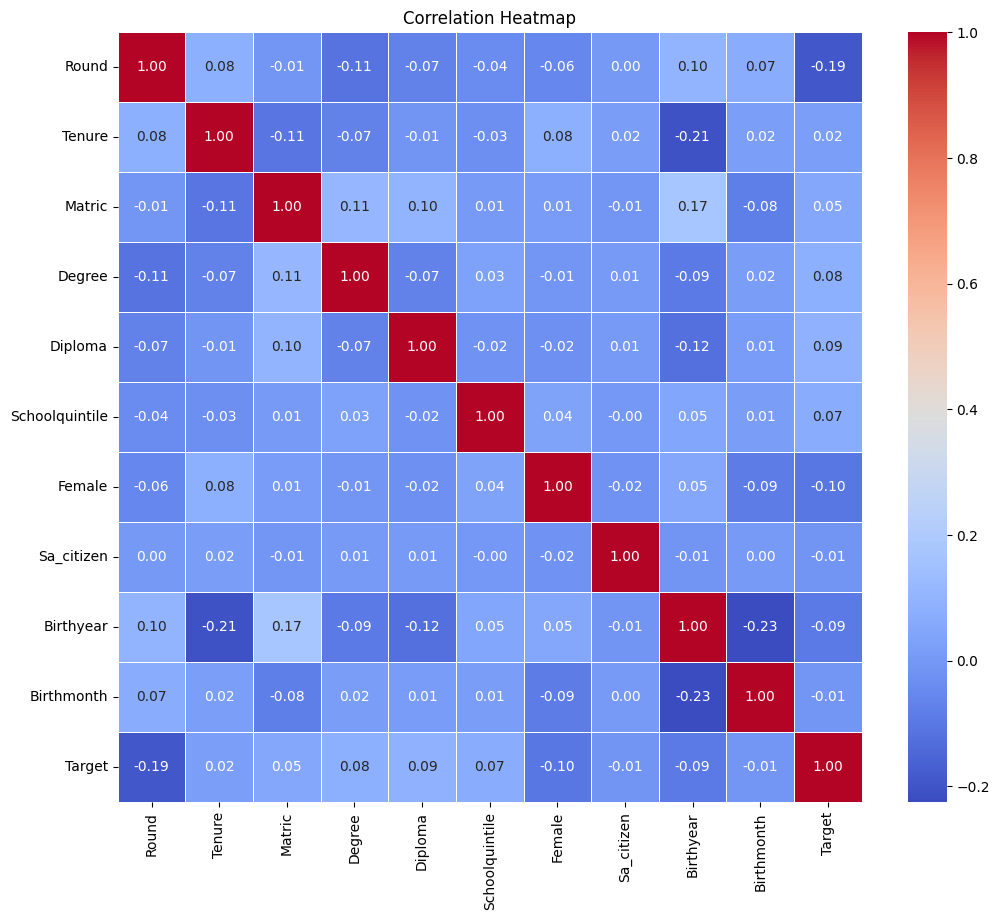

In [ ]:

correlation_matrix = df_train.corr()

# Create a heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()


In [ ]:
correlation_with_target = df_train.corr()[['Target']]
correlation_with_target


,Target
Round,-0.192630
Tenure,0.022178
Matric,0.048094
Degree,0.079067
Diploma,0.090482
Schoolquintile,0.071164
Female,-0.103646
Sa_citizen,-0.011438
Birthyear,-0.093354
Birthmonth,-0.007056


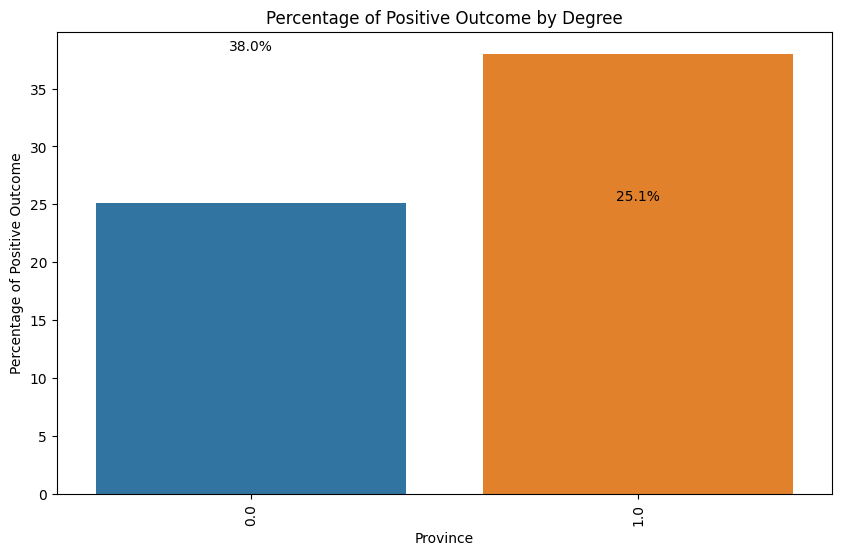

In [ ]:

df_province = df_train.groupby('Degree').agg(percentage=('Target', 'mean')).reset_index()
df_province["percentage"] = df_province["percentage"] * 100
df_province = df_province.sort_values('percentage', ascending=False).reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(data=df_province, x='Degree', y='percentage')
plt.xlabel('Province')
plt.ylabel('Percentage of Positive Outcome')
plt.title('Percentage of Positive Outcome by Degree')

for index, row in df_province.sort_values('percentage', ascending=False).iterrows():
  plt.text(row.name, row.percentage, f"{round(row.percentage, 1)}%", ha='center', va='bottom')
plt.xticks(rotation=90, ha='center')

plt.show()

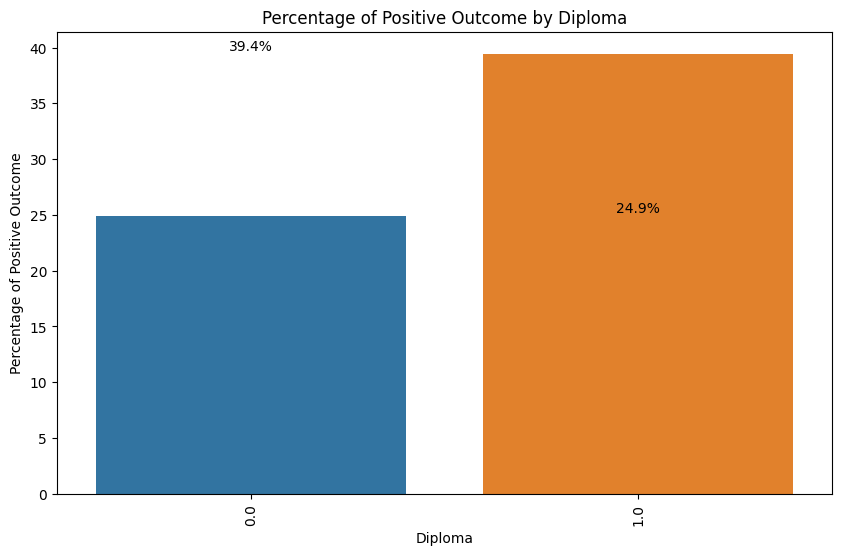

In [ ]:
df_province = df_train.groupby('Diploma').agg(percentage=('Target', 'mean')).reset_index()
df_province["percentage"] = df_province["percentage"] * 100
df_province = df_province.sort_values('percentage', ascending=False).reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(data=df_province, x='Diploma', y='percentage')
plt.xlabel('Diploma')
plt.ylabel('Percentage of Positive Outcome')
plt.title('Percentage of Positive Outcome by Diploma')

for index, row in df_province.sort_values('percentage', ascending=False).iterrows():
  plt.text(row.name, row.percentage, f"{round(row.percentage, 1)}%", ha='center', va='bottom')
plt.xticks(rotation=90, ha='center')

plt.show()

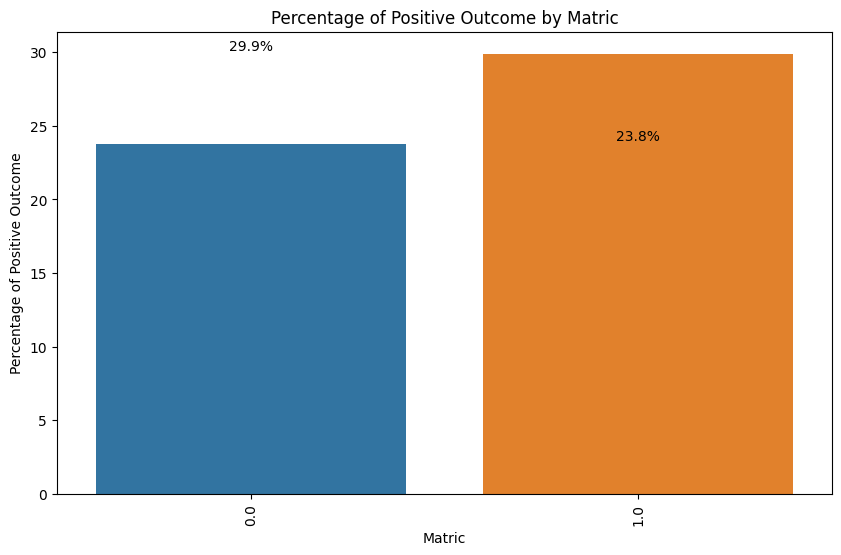

In [ ]:
df_province = df_train.groupby('Matric').agg(percentage=('Target', 'mean')).reset_index()
df_province["percentage"] = df_province["percentage"] * 100
df_province = df_province.sort_values('percentage', ascending=False).reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(data=df_province, x='Matric', y='percentage')
plt.xlabel('Matric')
plt.ylabel('Percentage of Positive Outcome')
plt.title('Percentage of Positive Outcome by Matric')

for index, row in df_province.sort_values('percentage', ascending=False).iterrows():
  plt.text(row.name, row.percentage, f"{round(row.percentage, 1)}%", ha='center', va='bottom')
plt.xticks(rotation=90, ha='center')

plt.show()

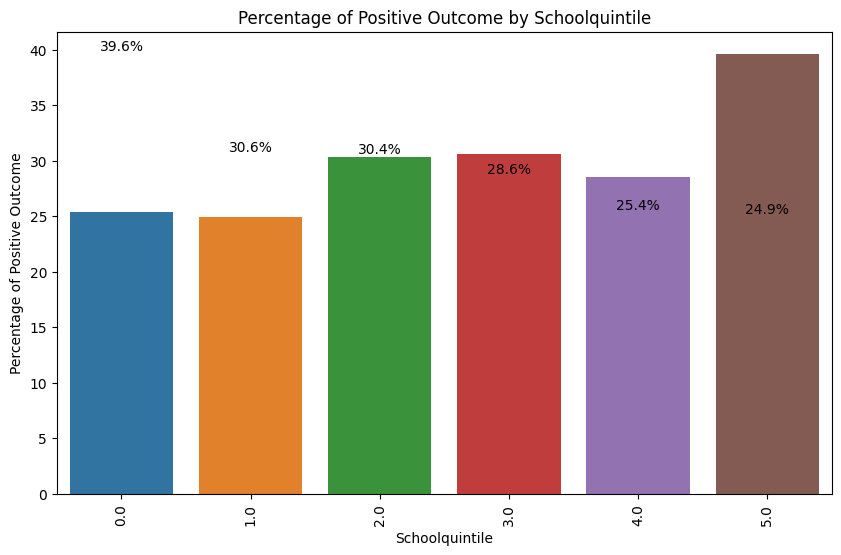

In [ ]:
df_province = df_train.groupby('Schoolquintile').agg(percentage=('Target', 'mean')).reset_index()
df_province["percentage"] = df_province["percentage"] * 100
df_province = df_province.sort_values('percentage', ascending=False).reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(data=df_province, x='Schoolquintile', y='percentage')
plt.xlabel('Schoolquintile')
plt.ylabel('Percentage of Positive Outcome')
plt.title('Percentage of Positive Outcome by Schoolquintile')

for index, row in df_province.sort_values('percentage', ascending=False).iterrows():
  plt.text(row.name, row.percentage, f"{round(row.percentage, 1)}%", ha='center', va='bottom')
plt.xticks(rotation=90, ha='center')

plt.show()

 ## Summary/insights and Assumption based on Target vs education related features

There is a weak positive correlation between having a 'Matric'and the target variable.could it be bacause of lack of necessary skills from matric subjects? not many are expcted to be be employment by having matric only


There is a stronger positive correlation between having a 'Degree/diploma' and the target variable. your more likely to be employed with degree/diploma


higher positive outcome in School Quintile 0, followed by Quintile 1, could be influenced by various  factors,

Government Funding and Interventions: It's possible that higher government funding and targeted interventions in schools within Quintile 0 and Quintile 1 have improved the quality of education and resources available to students. This could result in better preparation for employment. could it be?

Economic Background: Individuals in Quintile 0 and Quintile 1  come from poor families with different economic backgrounds, which can impact their motivations and opportunities for pursuing employment. For instance, those from lower-income backgrounds (Quintile 1) might be more driven to secure employment to support themselves and their families.

Educational Aspirations: The percentage of people from these quintiles pursuing employment instead of other activities, such as further studies, can also play a role. Quintile 0 and Quintile 1 individuals might prioritize early entry into the workforce, while those in higher quintiles may be more likely to pursue higher education before seeking employment,

##Target and Location variables

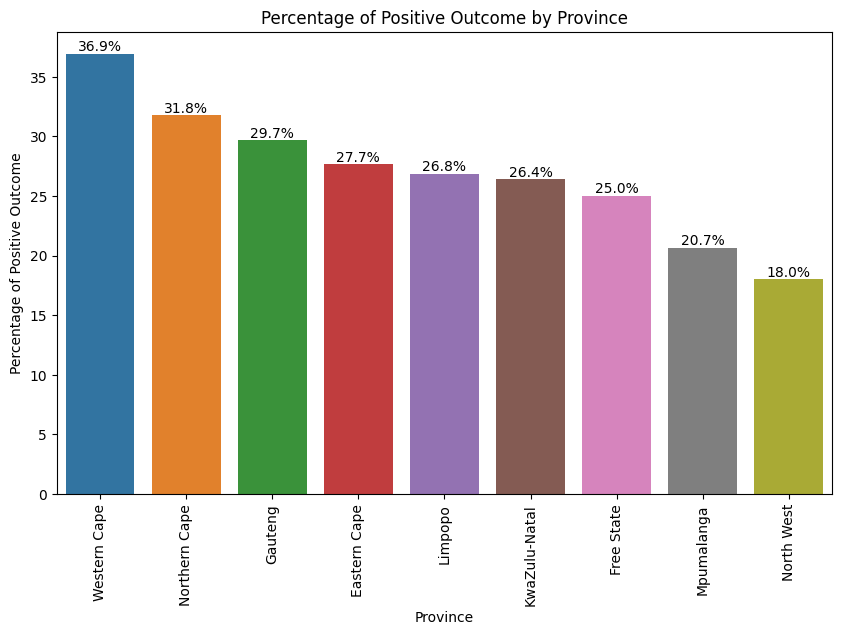

In [ ]:
df_province = df_train.groupby('Province').agg(percentage=('Target', 'mean')).reset_index()
df_province["percentage"] = df_province["percentage"] * 100
df_province = df_province.sort_values('percentage', ascending=False).reset_index()


plt.figure(figsize=(10, 6))
sns.barplot(data=df_province, x='Province', y='percentage')
plt.xlabel('Province')
plt.ylabel('Percentage of Positive Outcome')
plt.title('Percentage of Positive Outcome by Province')

for index, row in df_province.sort_values('percentage', ascending=False).iterrows():
  plt.text(row.name, row.percentage, f"{round(row.percentage, 1)}%", ha='center', va='bottom')
plt.xticks(rotation=90, ha='center')

plt.show()

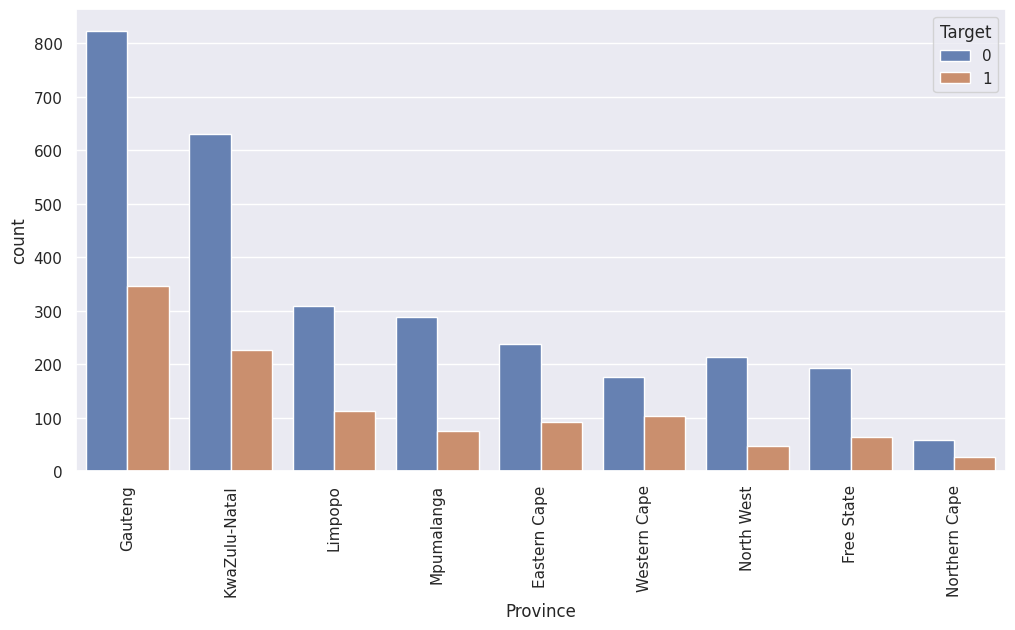

In [ ]:
sns.set_theme(style="darkgrid", font='sans-serif', context='notebook')
province_counts = df_train['Province'].value_counts()
sorted_provinces = province_counts.index
sns.set_palette('muted', 10, .75, 'bright')
plt.figure(figsize=(12, 6))
sns.countplot(x='Province', data=df_train, hue='Target', order=sorted_provinces)
plt.xticks(rotation=90)

plt.show()


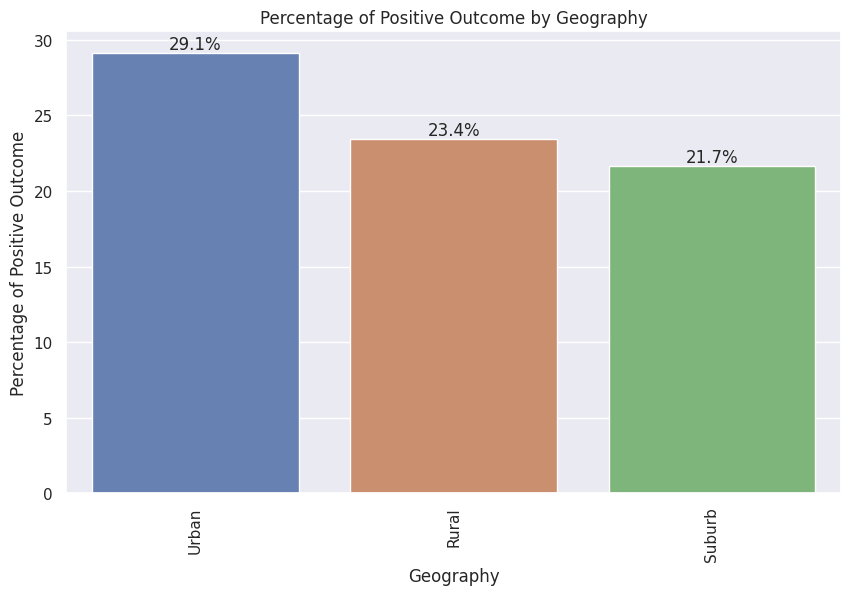

In [ ]:
df_province = df_train.groupby('Geography').agg(percentage=('Target', 'mean')).reset_index()
df_province["percentage"] = df_province["percentage"] * 100
df_province = df_province.sort_values('percentage', ascending=False).reset_index()


plt.figure(figsize=(10, 6))
sns.barplot(data=df_province, x='Geography', y='percentage')
plt.xlabel('Geography')
plt.ylabel('Percentage of Positive Outcome')
plt.title('Percentage of Positive Outcome by Geography')

for index, row in df_province.sort_values('percentage', ascending=False).iterrows():
  plt.text(row.name, row.percentage, f"{round(row.percentage, 1)}%", ha='center', va='bottom')
plt.xticks(rotation=90, ha='center')

plt.show()

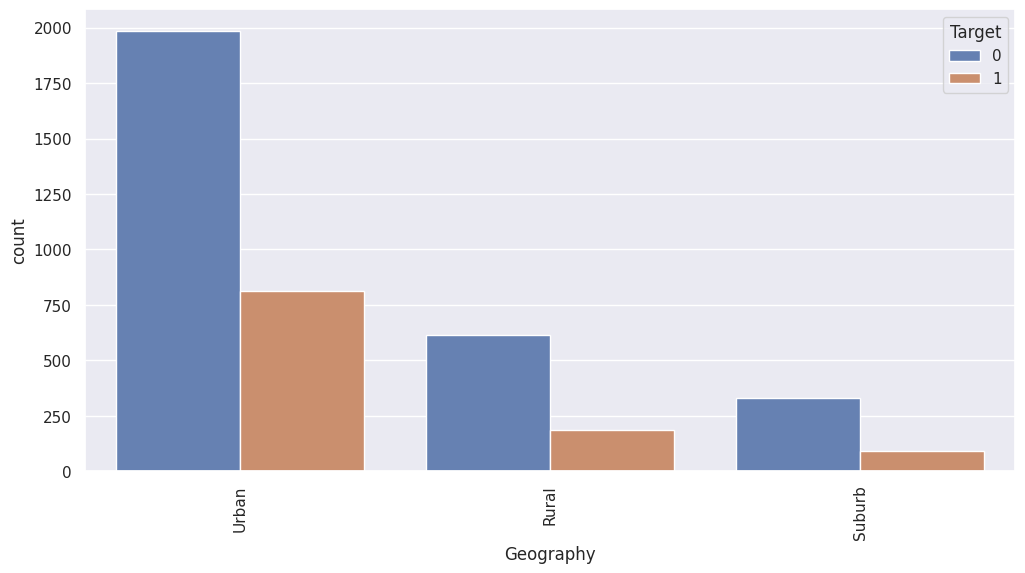

In [ ]:
sns.set_theme(style="darkgrid", font='sans-serif', context='notebook')
province_counts = df_train['Geography'].value_counts()
sorted_provinces = province_counts.index
sns.set_palette('muted', 10, .75, 'bright')
plt.figure(figsize=(12, 6))
sns.countplot(x='Geography', data=df_train, hue='Target', order=sorted_provinces)
plt.xticks(rotation=90)

plt.show()

##Summary/insights and Assumption based on Target vs location related features

Western Cape province has a higher average positive outcome followed by Northern Cape and Gauteng. Could this be due to more opportunities available compared to other provinces, or is it because of undersampling, resulting in a limited number of individuals from Northern Cape and Western Cape, thus not accurately representing the general population?

Urban areas have a higher positive outcome followed by rural areas. Could this be because fewer individuals in suburban areas are actively seeking jobs?



#Multivariate Analysis

#Status Vs Degree vs Diploma vs Matric vs Schoolquintile

In [ ]:
df = pd.crosstab(df_train["Status"], df_train["Degree"])
df


Degree,0.0,1.0
Status,,
employment programme,11,2
other,136,20
self employed,90,8
studying,504,61
unemployed,920,51
wage and self employed,1,0
wage employed,356,29


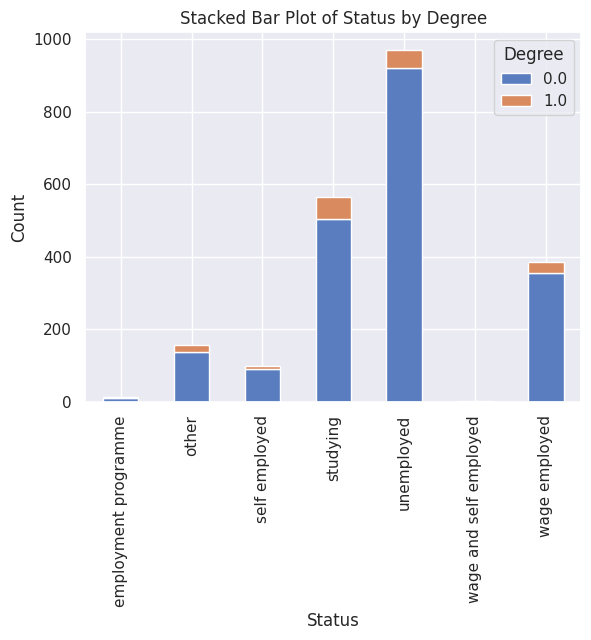

In [ ]:
stacked_bar = pd.crosstab(df_train["Status"], df_train["Degree"]).plot(kind="bar", stacked=True)
plt.xlabel('Status')
plt.ylabel('Count')
plt.title('Stacked Bar Plot of Status by Degree')
plt.legend(title="Degree")
plt.show()

Formulate hypotheses let's test whether there is  association between "Status" and "Degree"

Null Hypothesis (H0): There is no significant association between "Status" and "Degree."

Alternative Hypothesis (H1): There is a significant association between "Status" and "degree."



In [ ]:
from scipy.stats import chi2_contingency

contingency_table = pd.crosstab(df_train['Status'], df_train['Degree'])

chi2_stat, p_value, dof, expected = stats.chi2_contingency(contingency_table)
print("Chi-square statistic:", chi2_stat)
print("P-Value:", p_value)

Chi-square statistic: 22.434623262900086
P-Value: 0.0010097286040650743


 reject null hypothesis  there is a significant association between "Status" and "Degree based on low P-Value

In [ ]:
df2 = pd.crosstab(df_train["Status"], df_train["Diploma"])
df2

Diploma,0.0,1.0
Status,,
employment programme,10,4
other,139,19
self employed,90,8
studying,511,58
unemployed,921,57
wage and self employed,1,0
wage employed,359,34


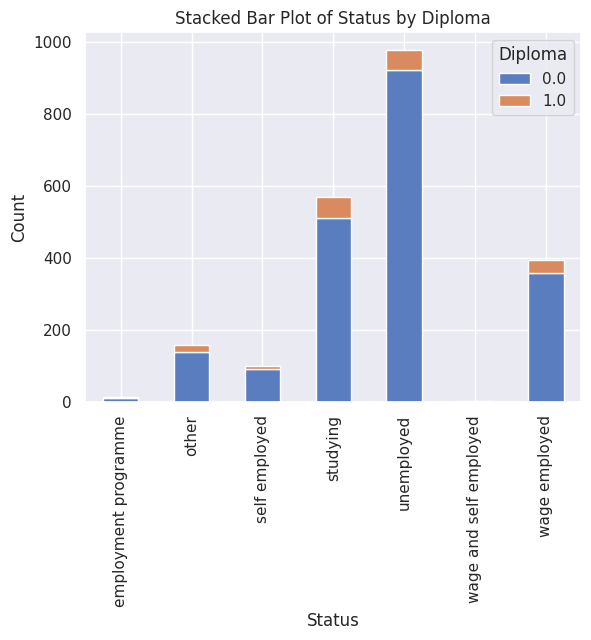

In [ ]:
stacked_bar = pd.crosstab(df_train["Status"], df_train["Diploma"]).plot(kind="bar", stacked=True)
plt.xlabel('Status')
plt.ylabel('Count')
plt.title('Stacked Bar Plot of Status by Diploma')
plt.legend(title="Diploma")
plt.show()

In [ ]:
df3 = pd.crosstab(df_train["Status"], df_train["Matric"])
df3

Matric,0.0,1.0
Status,,
employment programme,3,25
other,22,195
self employed,23,122
studying,75,668
unemployed,249,1042
wage and self employed,0,6
wage employed,78,504


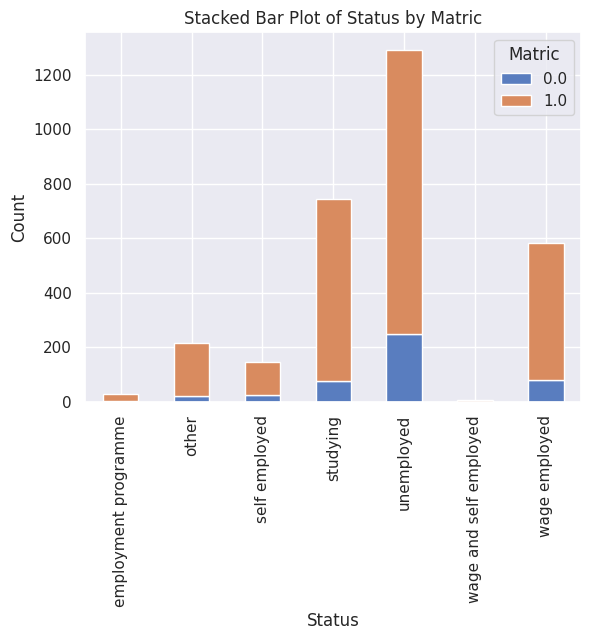

In [ ]:
stacked_bar = pd.crosstab(df_train["Status"], df_train["Matric"]).plot(kind="bar", stacked=True)
plt.xlabel('Status')
plt.ylabel('Count')
plt.title('Stacked Bar Plot of Status by Matric')
plt.legend(title="Matric")
plt.show()

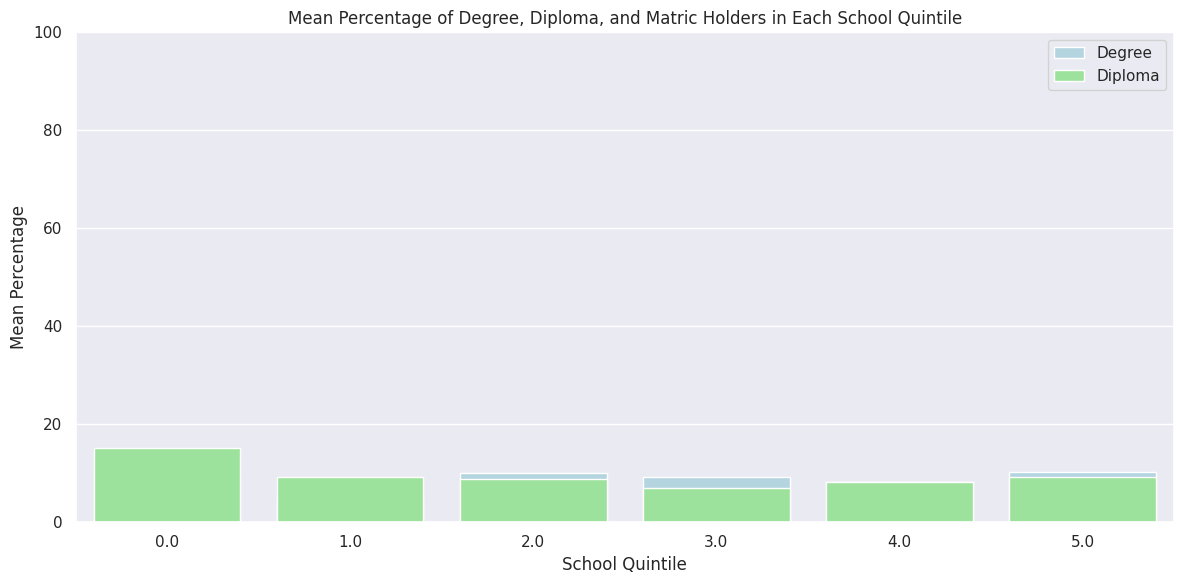

In [ ]:

mean_by_quintile = df_train.groupby('Schoolquintile')[['Degree', 'Diploma']].mean() * 100
plt.figure(figsize=(12, 6))
sns.barplot(data=mean_by_quintile.reset_index(), x='Schoolquintile', y='Degree', color='lightblue', label='Degree')
sns.barplot(data=mean_by_quintile.reset_index(), x='Schoolquintile', y='Diploma', color='lightgreen', label='Diploma')


plt.xlabel('School Quintile')
plt.ylabel('Mean Percentage')
plt.title('Mean Percentage of Degree, Diploma, and Matric Holders in Each School Quintile')
plt.xticks(rotation=0)
plt.ylim(0, 100)
plt.legend()
plt.tight_layout()
plt.show()




# Data Cleaning and Feature Engineering

Missing Values Imputation

In [ ]:
missing_values = df_train.isnull().sum()
missing_percentage = (missing_values / len(df_train)) * 100
missing_data = pd.DataFrame({'Missing Values': missing_values, 'Missing Percentage': missing_percentage})
missing_data = missing_data.sort_values(by='Missing Percentage', ascending=False)
print(missing_data)

                 Missing Values  Missing Percentage
Home_lang                  3639           90.522388
Science                    3288           81.791045
Math                       3023           75.199005
Mathlit                    2667           66.343284
Additional_lang            2002           49.800995
Degree                     1831           45.547264
Diploma                    1809           45.000000
Schoolquintile             1661           41.318408
Tenure                     1394           34.676617
Matric                     1008           25.074627
Birthmonth                    0            0.000000
Birthyear                     0            0.000000
Sa_citizen                    0            0.000000
Female                        0            0.000000
Person_id                     0            0.000000
Survey_date                   0            0.000000
Province                      0            0.000000
Geography                     0            0.000000
Status      

In [ ]:
missing_values = df_test.isnull().sum()
missing_percentage = (missing_values / len(df_test)) * 100
missing_data = pd.DataFrame({'Missing Values': missing_values, 'Missing Percentage': missing_percentage})
missing_data = missing_data.sort_values(by='Missing Percentage', ascending=False)
print(missing_data)

                 Missing Values  Missing Percentage
Home_lang                  1750           90.486039
Science                    1580           81.695967
Math                       1439           74.405377
Mathlit                    1319           68.200620
Additional_lang             983           50.827301
Degree                      888           45.915202
Diploma                     881           45.553257
Schoolquintile              818           42.295760
Tenure                      732           37.849018
Matric                      524           27.094105
Birthyear                     0            0.000000
Sa_citizen                    0            0.000000
Female                        0            0.000000
Person_id                     0            0.000000
Survey_date                   0            0.000000
Province                      0            0.000000
Geography                     0            0.000000
Status                        0            0.000000
Round       

In [ ]:
people_with_matric_missing_schoolquintile = df_train[(df_train['Matric'] == 1) & (df_train['Schoolquintile'].isna())]
people_with_matric_missing_schoolquintile


,Person_id,Survey_date,Round,Status,Tenure,Geography,Province,Matric,Degree,Diploma,Schoolquintile,Math,Mathlit,Additional_lang,Home_lang,Science,Female,Sa_citizen,Birthyear,Birthmonth,Target
2,Id_9h0isj38y4,2022-08-08,3,other,NaN,Urban,Free State,1.0,0.0,0.0,NaN,30 - 39 %,NaN,40 - 49 %,NaN,30 - 39 %,0,1,1996,7,1
14,Id_zaol8djev9,2022-03-02,2,unemployed,796.0,Urban,KwaZulu-Natal,1.0,NaN,NaN,NaN,30 - 39 %,NaN,70 - 79 %,NaN,30 - 39 %,0,1,2000,12,0
18,Id_p9215a0s3n,2022-08-12,3,other,NaN,Urban,Western Cape,1.0,NaN,NaN,NaN,NaN,40 - 49 %,60 - 69 %,NaN,NaN,1,1,1999,10,1
30,Id_la2wedbqnn,2023-02-13,4,wage employed,334.0,Rural,North West,1.0,0.0,0.0,NaN,NaN,30 - 39 %,50 - 59 %,NaN,NaN,1,1,2000,1,0
32,Id_fvro19s1he,2023-03-15,4,studying,NaN,Rural,Mpumalanga,1.0,1.0,0.0,NaN,0 - 29 %,NaN,60 - 69 %,NaN,NaN,1,1,2000,6,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3991,Id_fmyw476hub,2022-08-04,3,wage employed,NaN,Suburb,Eastern Cape,1.0,NaN,NaN,NaN,0 - 29 %,NaN,50 - 59 %,NaN,NaN,1,1,1992,3,0
3992,Id_ex06sz97uq,2022-08-15,3,studying,NaN,Urban,Gauteng,1.0,0.0,0.0,NaN,NaN,40 - 49 %,60 - 69 %,NaN,NaN,1,1,2002,5,0
4001,Id_2e1rfvlrjv,2022-08-02,3,wage employed,NaN,Urban,KwaZulu-Natal,1.0,0.0,0.0,NaN,30 - 39 %,NaN,60 - 69 %,NaN,NaN,0,1,1997,8,0
4004,Id_6cuhx2z7ec,2023-02-28,4,studying,NaN,Urban,Limpopo,1.0,0.0,0.0,NaN,NaN,40 - 49 %,50 - 59 %,NaN,NaN,0,1,1998,10,0


In [ ]:
people_NO_matric_missing_schoolquintile = df_train[(df_train['Matric'] == 0) & (df_train['Schoolquintile'].isna())]
people_NO_matric_missing_schoolquintile

,Person_id,Survey_date,Round,Status,Tenure,Geography,Province,Matric,Degree,Diploma,Schoolquintile,Math,Mathlit,Additional_lang,Home_lang,Science,Female,Sa_citizen,Birthyear,Birthmonth,Target
21,Id_v9hd6vf2zj,2023-02-15,4,unemployed,2593.0,Urban,KwaZulu-Natal,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,1,1,1994,1,0
47,Id_yvzil0ca5k,2021-08-11,1,studying,NaN,Urban,Gauteng,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,1,1,2000,4,1
59,Id_6jmt7mdvzq,2022-07-29,3,other,NaN,Rural,Limpopo,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,1,1993,7,1
68,Id_h3nbp8l8nx,2023-03-08,4,unemployed,2256.0,Rural,Limpopo,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,1,1994,6,0
69,Id_3edx8npgyr,2023-03-14,4,unemployed,2986.0,Rural,Northern Cape,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,1,1,1995,10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3907,Id_p8c7cilcme,2023-02-24,4,unemployed,1528.0,Urban,Free State,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0,1,1995,5,0
3928,Id_ine6aaypre,2022-03-16,2,studying,NaN,Rural,Eastern Cape,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,1,1,2000,1,0
3937,Id_6toc32fock,2022-08-04,3,studying,NaN,Urban,Northern Cape,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,1,1,2002,11,0
3949,Id_v1fq1yi1vf,2022-08-10,3,self employed,36.0,Urban,KwaZulu-Natal,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,1,1,1993,8,1


 using this results i filled their missing schoolquintile with the most occuring Schoolquintile which is 3. I assumed that all with no matric and missing Schoolquintile was due to failure/drop out

In [ ]:
# Fill NaN values in 'Schoolquintile' with 3 for rows with 'Matric' equal to 0 or 1
df_train.loc[df_train['Matric'].isin([0, 1]), 'Schoolquintile'] = df_train.loc[df_train['Matric'].isin([0, 1]), 'Schoolquintile'].fillna(3)
df_test.loc[df_test['Matric'].isin([0, 1]), 'Schoolquintile'] = df_test.loc[df_test['Matric'].isin([0, 1]), 'Schoolquintile'].fillna(3)

In [ ]:

people_with_missing_school_and_matric_train = df_train[df_train['Schoolquintile'].isna() & df_train['Matric'].isna()]
print("Rows with missing Schoolquintile and Matric in df_train:")
people_with_missing_school_and_matric_train

Rows with missing Schoolquintile and Matric in df_train:


,Person_id,Survey_date,Round,Status,Tenure,Geography,Province,Matric,Degree,Diploma,Schoolquintile,Math,Mathlit,Additional_lang,Home_lang,Science,Female,Sa_citizen,Birthyear,Birthmonth,Target
3,Id_5ch3zwpdef,2022-03-16,2,unemployed,810.0,Urban,Eastern Cape,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,1,2000,1,0
4,Id_g4elxibjej,2023-03-22,4,studying,NaN,Urban,Limpopo,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,1,1998,12,0
5,Id_l9uksprsdf,2023-03-23,4,studying,NaN,Rural,KwaZulu-Natal,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,1,1996,12,0
9,Id_mj4hcy8x75,2023-03-01,4,self employed,1859.0,Rural,Limpopo,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,1,1991,4,1
22,Id_sbqyyc6c6z,2023-03-23,4,studying,NaN,Urban,KwaZulu-Natal,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,1,1999,8,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3996,Id_lf16ayw2jg,2022-07-29,3,wage employed,NaN,Urban,Gauteng,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,1,1990,11,0
3997,Id_6oeo6uus3l,2023-02-21,4,studying,NaN,Urban,KwaZulu-Natal,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,1,1996,9,0
4003,Id_imj31qup9c,2023-02-21,4,studying,NaN,Suburb,Eastern Cape,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,1,1995,12,0
4012,Id_iqx0jvqalz,2022-08-12,3,self employed,889.0,Urban,Eastern Cape,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,1,1999,3,1


If you miss both matric and schoolquintile i treated it as an unknown data  and therefore fill those missing values with 0,

In [ ]:

df_train.loc[df_train['Matric'].isin([0, 1]), 'Schoolquintile'] = df_train.loc[df_train['Matric'].isin([0, 1]), 'Schoolquintile'].fillna(3)
df_test.loc[df_test['Matric'].isin([0, 1]), 'Schoolquintile'] = df_test.loc[df_test['Matric'].isin([0, 1]), 'Schoolquintile'].fillna(3)



df_train['Degree'].fillna(0, inplace=True)
df_train['Diploma'].fillna(0, inplace=True)


df_test['Degree'].fillna(0, inplace=True)
df_test['Diploma'].fillna(0, inplace=True)



df_train['Tenure'].fillna(0, inplace=True)
df_test['Tenure'].fillna(0, inplace=True)


df_train.loc[df_train['Matric'].isna() & df_train['Schoolquintile'].isna(), ['Matric', 'Schoolquintile']] = 0
df_test.loc[df_test['Matric'].isna() & df_test['Schoolquintile'].isna(), ['Matric', 'Schoolquintile']] = 0

using results from plots/ distributions  for Degree ,Diploma and Tenure fill them with 0

Renaming the Gender feature

In [ ]:
df_train.rename(columns={'Female': 'Gender'}, inplace=True)
df_test.rename(columns={'Female': 'Gender'}, inplace=True)

South african education system in high school group marks in levels each level of achievement corresponds to a specific percentage range

Level 7: 80 – 100% (Outstanding achievement)

Level 6: 70 – 79% (Meritorious achievement)

Level 5: 60 – 69% (Substantial achievement)

Level 4: 50 – 59% (Moderate achievement)

Level 3: 40 – 49% (Adequate achievement)

Level 2: 30 – 39% (Elementary achievement

Level 1: 0 – 29% (Not achieved – Fail)

In [ ]:
#Defining a function that will
#Convert percentage to strings
#Remove percentage symbols
#and also remove any spaces
def clean_percentage_value(percentage_str):
    if pd.notnull(percentage_str):
        percentage_str = str(percentage_str)
        percentage_str = percentage_str.replace('%', '')
        percentage_str = percentage_str.replace(' ', '')
        return percentage_str
    return None

Categorizing marks with levels

In [ ]:
def map_percentage_to_level(percentage_range):
    if pd.notnull(percentage_range):
        if '-' in percentage_range:
            start, end = percentage_range.split('-')
            if start.isdigit() and end.isdigit():
                percentage = int(start) + (int(end) - int(start)) / 2
                if 0 <= percentage <= 29:
                    return 1
                elif 30 <= percentage <= 39:
                    return 2
                elif 40 <= percentage <= 49:
                    return 3
                elif 50 <= percentage <= 59:
                    return 4
                elif 60 <= percentage <= 69:
                    return 5
                elif 70 <= percentage <= 79:
                    return 6
                elif 80 <= percentage <= 100:
                    return 7

In [ ]:
df_train['Math'] = df_train['Math'].apply(clean_percentage_value)
df_train['Mathlit'] = df_train['Mathlit'].apply(clean_percentage_value)
df_train['Additional_lang'] = df_train['Additional_lang'].apply(clean_percentage_value)
df_train['Home_lang'] = df_train['Home_lang'].apply(clean_percentage_value)
df_train['Science'] = df_train['Science'].apply(clean_percentage_value)

df_train['Math_level'] = df_train['Math'].apply(map_percentage_to_level)
df_train['Mathlit_level'] = df_train['Mathlit'].apply(map_percentage_to_level)
df_train['Additional_lang_level'] = df_train['Additional_lang'].apply(map_percentage_to_level)
df_train['Home_lang_level'] = df_train['Home_lang'].apply(map_percentage_to_level)
df_train['Science_level'] = df_train['Science'].apply(map_percentage_to_level)


df_test['Math'] = df_test['Math'].apply(clean_percentage_value)
df_test['Mathlit'] = df_test['Mathlit'].apply(clean_percentage_value)
df_test['Additional_lang'] = df_test['Additional_lang'].apply(clean_percentage_value)
df_test['Home_lang'] = df_test['Home_lang'].apply(clean_percentage_value)
df_test['Science'] = df_test['Science'].apply(clean_percentage_value)

df_test['Math_level'] = df_test['Math'].apply(map_percentage_to_level)
df_test['Mathlit_level'] = df_test['Mathlit'].apply(map_percentage_to_level)
df_test['Additional_lang_level'] = df_test['Additional_lang'].apply(map_percentage_to_level)
df_test['Home_lang_level'] = df_test['Home_lang'].apply(map_percentage_to_level)
df_test['Science_level'] = df_test['Science'].apply(map_percentage_to_level)

Since the missing values in Math,Mathlit, Additional_lang and Home language are not random but rather systematic, i created  3 more variables/features that Classify what type of mathematics a person took, Home language/Additional and Science or other, And for those who dropped out/failed/ or never attended

In [ ]:
#MATHEMATICS OR MATHSLIT
def determine_math_type(row):
    if row['Math'] and not pd.isna(row['Math']):
        return 'Math'
    elif row['Mathlit'] and not pd.isna(row['Mathlit']):
        return 'Mathlit'
    else:
        return 'Unknown'

df_train['Mathematics/Maths_lit'] = df_train.apply(determine_math_type, axis=1)
df_test['Mathematics/Maths_lit'] = df_test.apply(determine_math_type, axis=1)

In [ ]:
#ADDITIONAL LANGUAGE OR HOME LANGUAGE
def determine_high_school_language(row):
    if row['Additional_lang'] and not pd.isna(row['Additional_lang']):
        return 'Additional_lang'
    elif row['Home_lang'] and not pd.isna(row['Home_lang']):
        return 'Home_lang'
    elif pd.isna(row['Additional_lang']) and pd.isna(row['Home_lang']):
        return 'Unknown'
    else:
        return 'Other'

df_train['Additional/Home_langauge'] = df_train.apply(determine_high_school_language, axis=1)
df_test['Additional/Home_langauge'] = df_test.apply(determine_high_school_language, axis=1)

In [ ]:
#SCIENCE STREAM/OTHER/UNKNOWN
def determine_high_school_science(row):
    if not pd.isna(row['Science']):
        return 'Science'
    elif pd.isna(row['Mathlit']) and pd.isna(row['Math']):
        return 'Unknown'
    else:
        return 'Other'

# Apply the function to create a new feature indicating high school science
df_train['Science/Other'] = df_train.apply(determine_high_school_science, axis=1)
df_test['Science/Other'] = df_test.apply(determine_high_school_science, axis=1)

In [ ]:
df_train.drop(['Math', 'Mathlit', 'Additional_lang', 'Home_lang', 'Science'], axis=1, inplace=True)
df_test.drop(['Math', 'Mathlit', 'Additional_lang', 'Home_lang', 'Science'], axis=1, inplace=True)

df_train.drop(['Math_level', 'Mathlit_level', 'Additional_lang_level', 'Home_lang_level','Science_level'], axis=1, inplace=True)
df_test.drop(['Math_level', 'Mathlit_level', 'Additional_lang_level', 'Home_lang_level','Science_level'], axis=1, inplace=True)

In [ ]:
df_train['Mathematics/Maths_lit'].unique(),df_train['Additional/Home_langauge'].unique(),df_train['Science/Other'].unique()

(array(['Math', 'Unknown', 'Mathlit'], dtype=object),
 array(['Additional_lang', 'Unknown', 'Home_lang'], dtype=object),
 array(['Science', 'Unknown', 'Other'], dtype=object))

In [ ]:
#HIGHEST QUALIFICATION A PERSON HAS
def categorize_highest_qualification(row):
    if row['Matric'] == 0 and row['Degree'] == 0 and row['Diploma'] == 0:
        return 'NONE/SOME_HIGH_/_PRIMARY'
    elif row['Degree'] == 1:
        return 'Degree'
    elif row['Diploma'] == 1:
        return 'Diploma'
    else:
        return 'Matric'

df_train['Highest_qualification'] = df_train.apply(categorize_highest_qualification, axis=1)
df_test['Highest_qualification'] = df_test.apply(categorize_highest_qualification, axis=1)

In [ ]:
df_train.head()

,Person_id,Survey_date,Round,Status,Tenure,Geography,Province,Matric,Degree,Diploma,Schoolquintile,Gender,Sa_citizen,Birthyear,Birthmonth,Target,Mathematics/Maths_lit,Additional/Home_langauge,Science/Other,Highest_qualification
0,Id_eqz61wz7yn,2022-02-23,2,studying,0.0,Rural,Mpumalanga,1.0,0.0,0.0,3.0,1,1,2000,5,0,Math,Additional_lang,Science,Matric
1,Id_kj5k3g5wud,2023-02-06,4,unemployed,427.0,Suburb,North West,1.0,0.0,0.0,1.0,1,1,1989,4,1,Math,Additional_lang,Science,Matric
2,Id_9h0isj38y4,2022-08-08,3,other,0.0,Urban,Free State,1.0,0.0,0.0,3.0,0,1,1996,7,1,Math,Additional_lang,Science,Matric
3,Id_5ch3zwpdef,2022-03-16,2,unemployed,810.0,Urban,Eastern Cape,0.0,0.0,0.0,0.0,0,1,2000,1,0,Unknown,Unknown,Unknown,NONE/SOME_HIGH_/_PRIMARY
4,Id_g4elxibjej,2023-03-22,4,studying,0.0,Urban,Limpopo,0.0,0.0,0.0,0.0,1,1,1998,12,0,Unknown,Unknown,Unknown,NONE/SOME_HIGH_/_PRIMARY


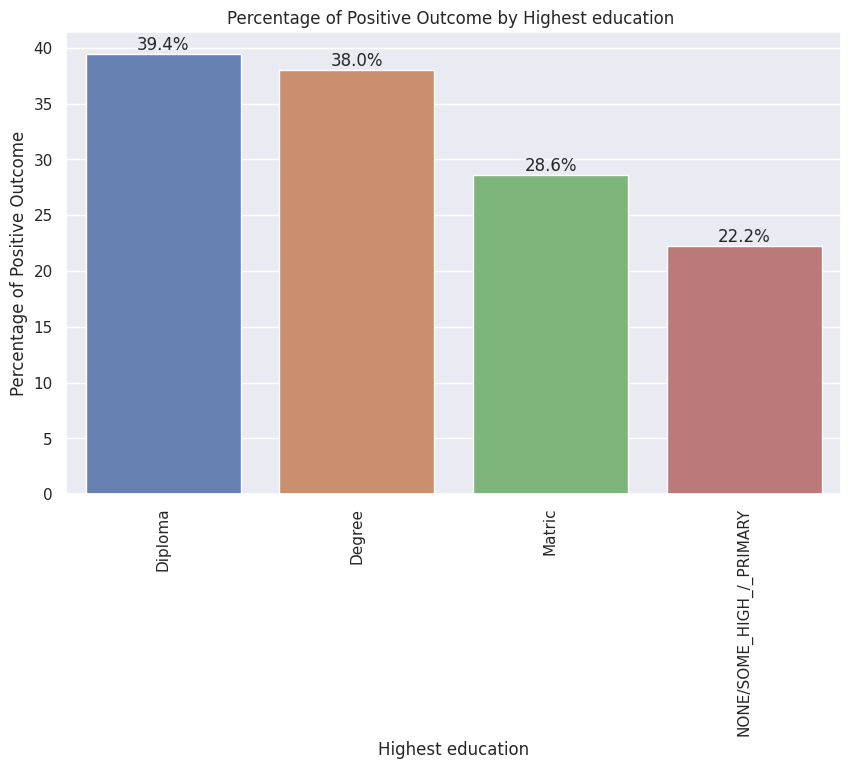

In [ ]:
df_province = df_train.groupby('Highest_qualification').agg(percentage=('Target', 'mean')).reset_index()
df_province["percentage"] = df_province["percentage"] * 100
df_province = df_province.sort_values('percentage', ascending=False).reset_index()


plt.figure(figsize=(10, 6))
sns.barplot(data=df_province, x='Highest_qualification', y='percentage')
plt.xlabel('Highest education')
plt.ylabel('Percentage of Positive Outcome')
plt.title('Percentage of Positive Outcome by Highest education ')

for index, row in df_province.sort_values('percentage', ascending=False).iterrows():
  plt.text(row.name, row.percentage, f"{round(row.percentage, 1)}%", ha='center', va='bottom')
plt.xticks(rotation=90, ha='center')

plt.show()

Date And  Age  Variables

In [ ]:
df_train['Survey_date'] = pd.to_datetime(df_train['Survey_date'])
df_test['Survey_date'] = pd.to_datetime(df_test['Survey_date'])

df_train['Survey_Month'] = pd.to_datetime(df_train['Survey_date']).dt.month
df_train['Survey_DayOfWeek'] = pd.to_datetime(df_train['Survey_date']).dt.dayofweek
df_train['Survey_Quarter'] = pd.to_datetime(df_train['Survey_date']).dt.quarter
df_train['Survey_Year'] = pd.to_datetime(df_train['Survey_date']).dt.year
df_train['Survey_Week'] = pd.to_datetime(df_train['Survey_date']).dt.week

df_test['Survey_Month'] = pd.to_datetime(df_test['Survey_date']).dt.month
df_test['Survey_DayOfWeek'] = pd.to_datetime(df_test['Survey_date']).dt.dayofweek
df_test['Survey_Quarter'] = pd.to_datetime(df_test['Survey_date']).dt.quarter
df_test['Survey_Year'] = pd.to_datetime(df_test['Survey_date']).dt.year
df_test['Survey_Week'] = pd.to_datetime(df_test['Survey_date']).dt.week

In [ ]:
df_train['Age_in_months'] = (df_train['Survey_Year'] - df_train['Birthyear']) * 12 + (df_train['Survey_Month'] - df_train['Birthmonth'])
df_train['Age_years'] = (df_train['Age_in_months'] / 12).round()
df_train.drop(['Age_in_months'], axis=1, inplace=True)


df_test['Age_in_months'] = (df_test['Survey_Year'] - df_test['Birthyear']) * 12 + (df_test['Survey_Month'] - df_test['Birthmonth'])
df_test['Age_years'] = (df_test['Age_in_months'] / 12).round()
df_test.drop(['Age_in_months'], axis=1, inplace=True)


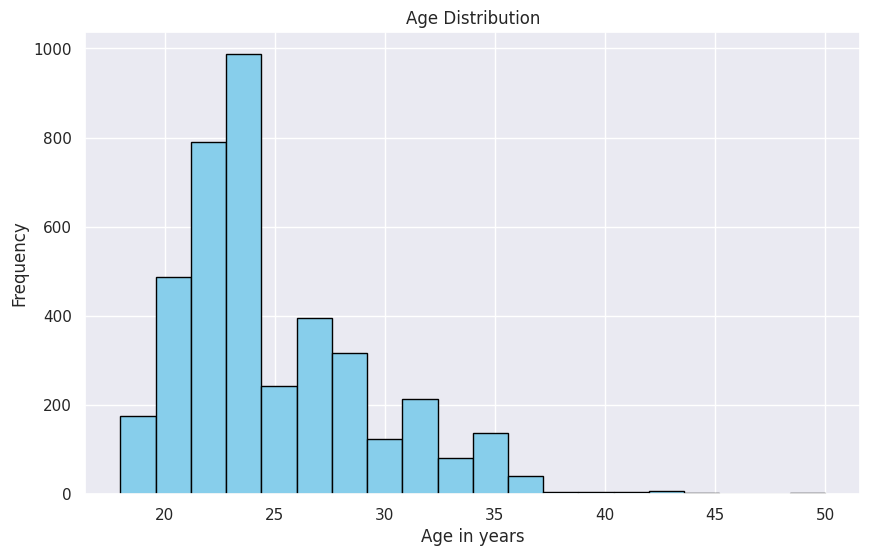

In [ ]:
plt.figure(figsize=(10, 6))
plt.hist(df_train['Age_years'], bins=20, color='skyblue', edgecolor='black')
plt.xlabel('Age in years')
plt.ylabel('Frequency')
plt.title('Age Distribution')
plt.grid(True)
plt.show()


Tenure related features

In [ ]:
bins = [-1, 0, 91, 365, 730, float('inf')]
labels = ['No Tenure', '0-3 Months', '3-12 Months', '1-2 Years', 'More than 2 Years']
df_train['Tenure_Group'] = pd.cut(df_train['Tenure'], bins=bins, labels=labels)
df_test['Tenure_Group'] = pd.cut(df_test['Tenure'], bins=bins, labels=labels)

#Pre-processing and Training Data Development

In [ ]:
df_train = df_train.drop(['Birthyear','Birthmonth',"Degree","Diploma",'Matric',"Sa_citizen"], axis = 1)
df_test = df_test.drop(['Birthyear','Birthmonth',"Degree","Diploma",'Matric',"Sa_citizen"], axis = 1)

In [ ]:
# Create a list of categorical variables
selected_vars = ['Status','Additional/Home_langauge','Mathematics/Maths_lit','Science/Other','Highest_qualification','Schoolquintile','Tenure_Group','Gender','Round','Province','Geography']
# Convert character variables to dummy variables
df_train = pd.get_dummies(df_train, columns=selected_vars, drop_first=True, dummy_na=False)
df_test = pd.get_dummies(df_test, columns=selected_vars, drop_first=True, dummy_na=False)

In [ ]:
Y=df_train['Target']
df_train = df_train.drop(["Person_id","Survey_date",'Target'], axis = 1)
df_test = df_test.drop(["Person_id","Survey_date"], axis = 1)

In [ ]:
X=df_train
test=df_test

In [ ]:
test.shape,X.shape

NameError: ignored

# MODELLING

In [ ]:
pip install catboost

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 9.9 MB/s eta 0:00:00


In [ ]:
from sklearn.model_selection import KFold
from sklearn.metrics import roc_auc_score
from catboost import CatBoostClassifier
import xgboost as xgb
import warnings
warnings.filterwarnings("ignore", category=UserWarning)

Training Catboost

In [ ]:
n_folds = 20
ensemble_predictions = np.zeros(len(X))
catboost_aucs = []
xgb_aucs = []
ensemble_aucs = []

kf = KFold(n_splits=n_folds, shuffle=True, random_state=42)
for fold, (train_index, val_index) in enumerate(kf.split(X)):
    X_train, X_val = X.iloc[train_index], X.iloc[val_index]
    Y_train, Y_val = Y.iloc[train_index], Y.iloc[val_index]


    catboost_model = CatBoostClassifier(iterations=3500, early_stopping_rounds=100, random_state=42)
    catboost_model.fit(X_train, Y_train, eval_set=(X_val, Y_val), use_best_model=True, verbose=False)
    catboost_proba = catboost_model.predict_proba(X_val)[:, 1]
    catboost_auc = roc_auc_score(Y_val, catboost_proba)
    print(f"Fold {fold + 1}:")
    print("CatBoost AUC:", catboost_auc)
    print()
    catboost_aucs.append(catboost_auc)
    ensemble_predictions[val_index] += catboost_proba


avg_catboost_auc = np.mean(catboost_aucs)
print("Average CatBoost AUC:", avg_catboost_auc)


ensemble_auc = roc_auc_score(Y, ensemble_predictions)
print("Ensemble AUC:", ensemble_auc)



Fold 1:
CatBoost AUC: 0.8820843091334895

Fold 2:
CatBoost AUC: 0.8499585520862116

Fold 3:
CatBoost AUC: 0.8807261208576997

Fold 4:
CatBoost AUC: 0.828342798141456

Fold 5:
CatBoost AUC: 0.8452503871966959

Fold 6:
CatBoost AUC: 0.8711822660098523

Fold 7:
CatBoost AUC: 0.8739035087719299

Fold 8:
CatBoost AUC: 0.8279911577783918

Fold 9:
CatBoost AUC: 0.9066603007877776

Fold 10:
CatBoost AUC: 0.8720140515222482

Fold 11:
CatBoost AUC: 0.8193853427895982

Fold 12:
CatBoost AUC: 0.9230346947738252

Fold 13:
CatBoost AUC: 0.8750993377483444

Fold 14:
CatBoost AUC: 0.9103343465045594

Fold 15:
CatBoost AUC: 0.8703875609190067

Fold 16:
CatBoost AUC: 0.8665413533834587

Fold 17:
CatBoost AUC: 0.854775828460039

Fold 18:
CatBoost AUC: 0.8834089191232048

Fold 19:
CatBoost AUC: 0.8713733075435203

Fold 20:
CatBoost AUC: 0.8744629430719656

Average CatBoost AUC: 0.8693458543301638
Ensemble AUC: 0.8696398893352142


Training Xgboost

In [ ]:

from sklearn.model_selection import KFold
from sklearn.metrics import roc_auc_score
import xgboost as xgb

n_folds = 20
ensemble_predictions = np.zeros(len(X))
xgb_aucs = []
ensemble_aucs = []

kf = KFold(n_splits=n_folds, shuffle=True, random_state=42)
for fold, (train_index, val_index) in enumerate(kf.split(X)):
    X_train, X_val = X.iloc[train_index], X.iloc[val_index]
    Y_train, Y_val = Y.iloc[train_index], Y.iloc[val_index]


    xgb_model = xgb.XGBClassifier(random_state=42)
    xgb_model.fit(X_train, Y_train, early_stopping_rounds=100, eval_set=[(X_val, Y_val)], verbose=False)
    xgb_proba = xgb_model.predict_proba(X_val)[:, 1]
    xgb_auc = roc_auc_score(Y_val, xgb_proba)
    print(f"Fold {fold + 1}:")
    print("XGBoost AUC:", xgb_auc)
    print()
    xgb_aucs.append(xgb_auc)
    ensemble_predictions[val_index] = xgb_proba


avg_xgb_auc = np.mean(xgb_aucs)
print("Average XGBoost AUC:", avg_xgb_auc)


ensemble_auc = roc_auc_score(Y, ensemble_predictions)
print("Ensemble AUC:", ensemble_auc)



Fold 1:
XGBoost AUC: 0.8988290398126464

Fold 2:
XGBoost AUC: 0.8312379110251452

Fold 3:
XGBoost AUC: 0.8916910331384016

Fold 4:
XGBoost AUC: 0.8447341249354672

Fold 5:
XGBoost AUC: 0.8546721734641198

Fold 6:
XGBoost AUC: 0.8758620689655173

Fold 7:
XGBoost AUC: 0.8670808966861598

Fold 8:
XGBoost AUC: 0.8509256700746063

Fold 9:
XGBoost AUC: 0.9203867271425161

Fold 10:
XGBoost AUC: 0.8751756440281031

Fold 11:
XGBoost AUC: 0.8301418439716313

Fold 12:
XGBoost AUC: 0.9382960035133947

Fold 13:
XGBoost AUC: 0.8712582781456953

Fold 14:
XGBoost AUC: 0.9079856313898866

Fold 15:
XGBoost AUC: 0.8746809004409376

Fold 16:
XGBoost AUC: 0.8752013963480129

Fold 17:
XGBoost AUC: 0.8607456140350878

Fold 18:
XGBoost AUC: 0.8901486520534139

Fold 19:
XGBoost AUC: 0.8909919867366677

Fold 20:
XGBoost AUC: 0.8651987110633726

Average XGBoost AUC: 0.8757622153485392
Ensemble AUC: 0.8756505900986212


Predictions

In [ ]:
catboost_model.fit(X, Y, verbose=False)
xgb_model.fit(X, Y, verbose=False)
catboost_test_proba = catboost_model.predict_proba(test)[:, 1]
xgb_test_proba = xgb_model.predict_proba(test)[:, 1]

ensemble_test_predictions = (catboost_test_proba + xgb_test_proba) / 2


In [ ]:
ensemble_test_predictions

array([0.97856648, 0.15200663, 0.17123347, ..., 0.0326074 , 0.07092131,
       0.45382201])

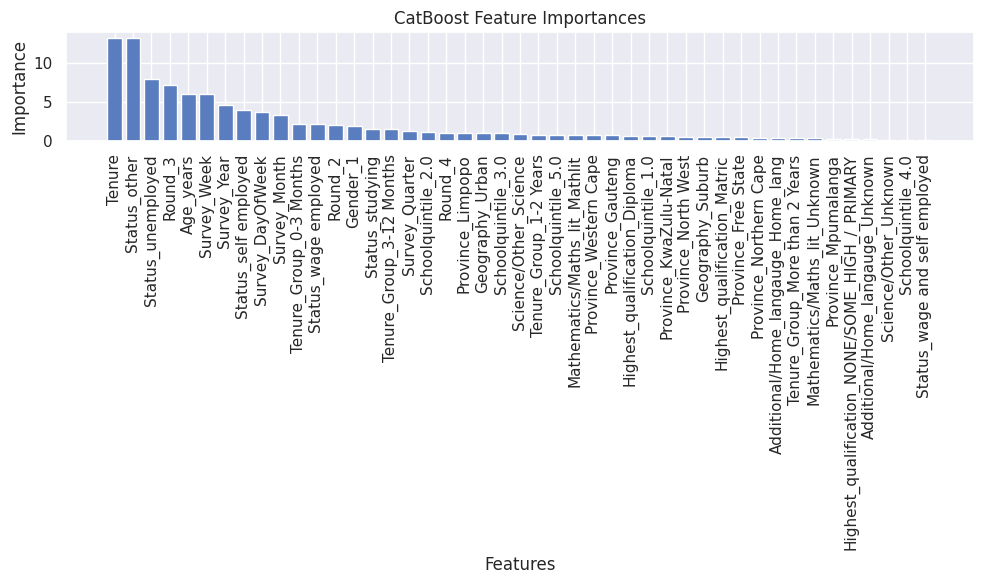

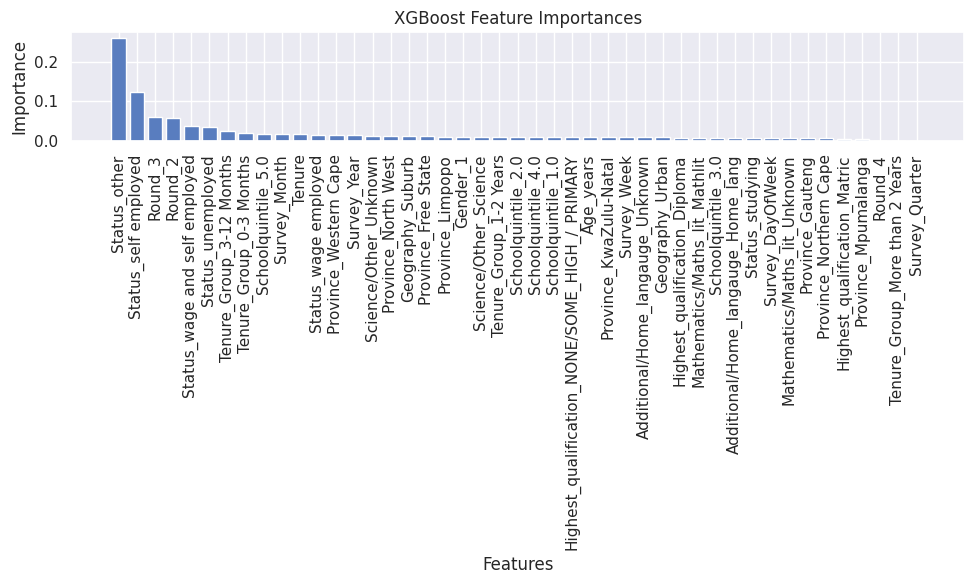

In [ ]:
catboost_feature_importance = catboost_model.get_feature_importance()
xgb_feature_importance = xgb_model.feature_importances_
catboost_feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': catboost_feature_importance})
catboost_feature_importance_df = catboost_feature_importance_df.sort_values(by='Importance', ascending=False)
xgb_feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': xgb_feature_importance})
xgb_feature_importance_df = xgb_feature_importance_df.sort_values(by='Importance', ascending=False)


plt.figure(figsize=(10, 6))
plt.bar(catboost_feature_importance_df['Feature'], catboost_feature_importance_df['Importance'])
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('CatBoost Feature Importances')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


plt.figure(figsize=(10, 6))
plt.bar(xgb_feature_importance_df['Feature'], xgb_feature_importance_df['Importance'])
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('XGBoost Feature Importances')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


##Submission

In [ ]:
Submission['Target'] = ensemble_test_predictions
Submission.to_csv('s11.csv', index=False)
Submission

,Person_id,Target
0,Id_r90136smvl,0.978566
1,Id_wawdqhmu6s,0.152007
2,Id_ap2czff2bu,0.171233
3,Id_uhgink7iha,0.168439
4,Id_5j6bzk3k81,0.055070
...,...,...
1929,Id_iogk84m72d,0.005032
1930,Id_exoifxvj0s,0.159053
1931,Id_ixio0xbvta,0.032607
1932,Id_3vjt2lnwp3,0.070921


#Improvements

Drop some  features

perfom hyperparameter tuning

try feature scalling

